In [1]:
import os
os.environ['SPS_HOME'] = "/global/homes/e/eramey16/fsps"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from docker import classify

In [2]:
import prospect
prospect.__version__

'1.1.0'

In [4]:
# with open('../data/dr9_training/dr9_unlensed/slurm-59923446.out') as f:
#     x = f.readlines()
# c4d_20211014_051411_i_v1.24
# c4d_20211014_051411_i_v1.24

# Reading model from IPTF16geu

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['SPS_HOME'] = "/global/homes/e/eramey16/fsps"
from prospect.io import read_results as reader
from prospect.plotting import corner
from prospect.plotting.utils import best_sample
lens_file = "/pscratch/sd/e/eramey16/data/monocle/iptf16geu/9906619143751091.h5"
non_lens = "/pscratch/sd/e/eramey16/data/monocle/cosmos_160/9906622120725643.h5"
test = "lensed_nonparam_faststep_opt.h5"
res, obs, model = reader.results_from(test)

In [6]:
def make_plots_for_h5(h5_file, ax_range=None, save=True):
    h5_handle = h5_file.split('.')[0]
    
    res, obs, model = reader.results_from(h5_file)
    tracefig = reader.traceplot(res)
    if save:
        savefile = 'figs/'+h5_handle+'_tracefig.png'
        plt.savefig(savefile, bbox_inches='tight')
    
    cornerfig = reader.subcorner(res, range=ax_range)
    if save:
        savefile = 'figs/'+h5_handle+'_subcorner.png'
        plt.savefig(savefile, bbox_inches='tight')
    
#     try: # worse corner plot
#         nsamples, ndim = res["chain"].shape[-2:]
#         cfig, axes = plt.subplots(ndim, ndim, figsize=(15,11))
#         axes = corner.allcorner(res["chain"].T, ['Mass', r'SFH ($\tau$)', 'Dust', 'Metallicity',
#                                                  'log($T_{max}$)'], axes, weights=res["weights"], 
#                                 color="royalblue", show_titles=True)
#         print([(ax.get_xlim(), ax.get_ylim()) for ax in axes])
#         pbest = best_sample(res)
#         corner.scatter(pbest[:, None], axes, color="firebrick", marker="o")
#         plt.tight_layout()
#         # plt.suptitle("Prospector fit for IPTF16geu", fontsize=20)
#         cfig.patch.set_facecolor('white')
        
#         if save:
#             savefile = 'figs/'+h5_handle+'_corner.png'
#             plt.savefig(savefile, bbox_inches='tight')
    # except: pass

In [7]:
files = ['lensed_emcee_param_csp.h5', 'unlensed_emcee_param_csp.h5', 
         'lensed_param_csp.h5', 'unlensed_param_csp.h5',
         'lensed_nonparam_faststep_opt.h5', 'unlensed_nonparam_faststep_opt.h5']
# for file in files:
#     save_plots_for_h5(file)

ValueError: not enough values to unpack (expected 2, got 0)

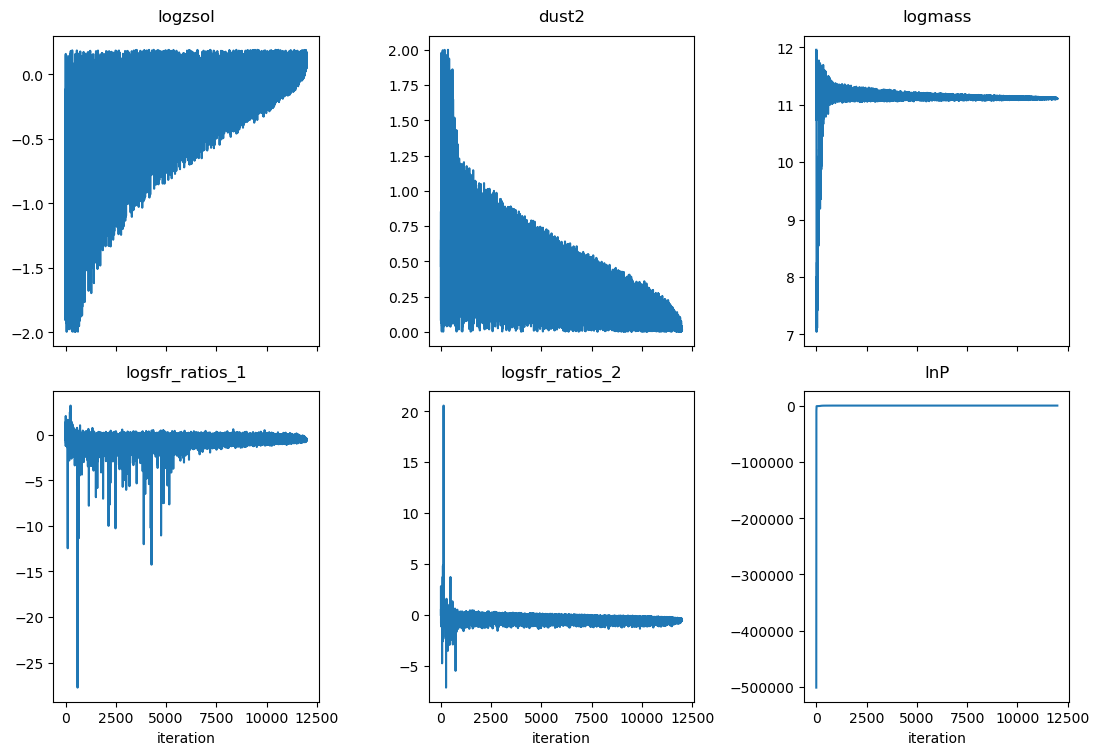

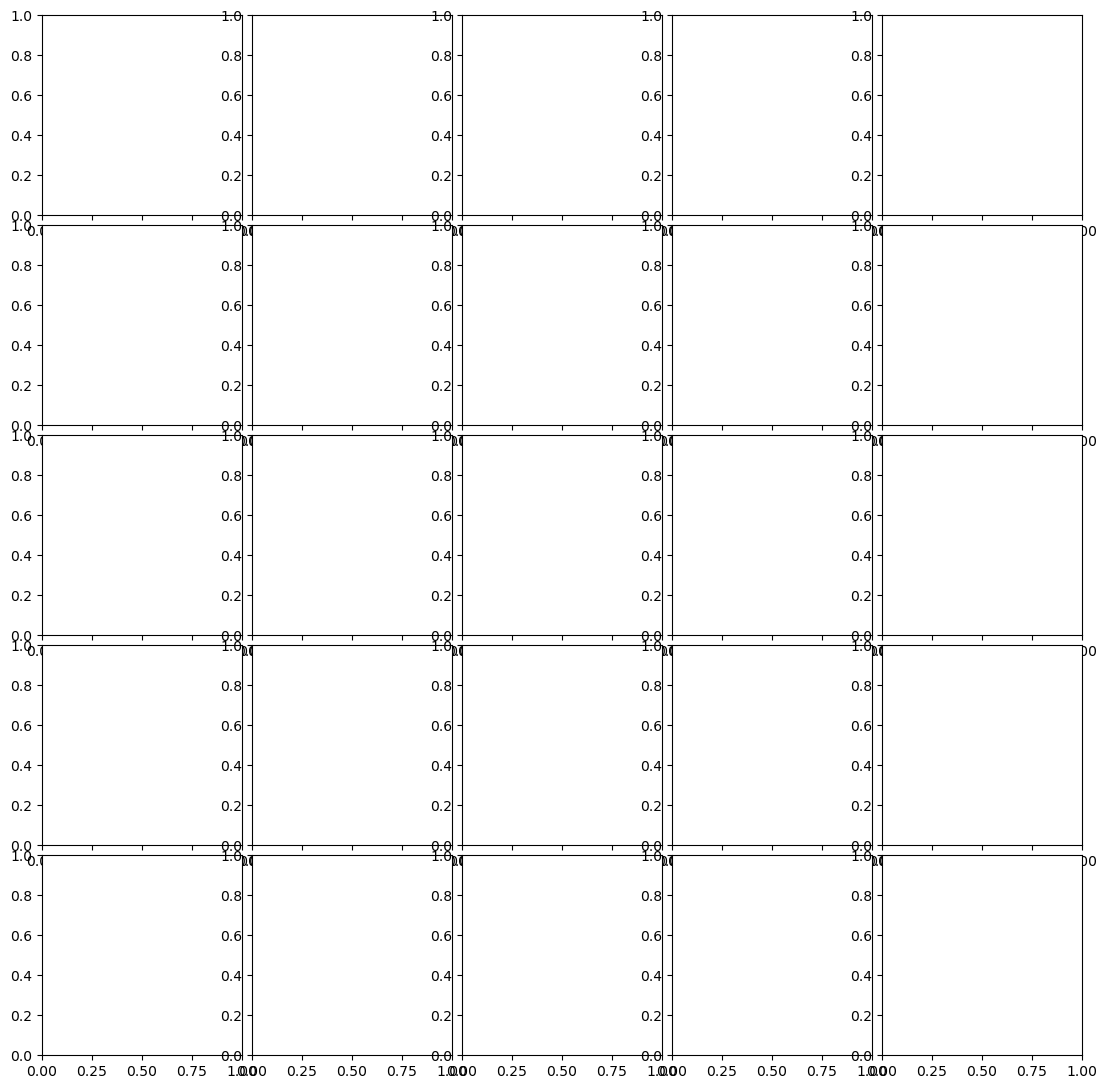

In [8]:
make_plots_for_h5(files[-1], ax_range=[(-1.5,1.5),()])

In [2]:
# bkdata, tbldata = classify.get_galaxy(9906620228572307)
# tbldata.iloc[0]
# New redshift and std dev: 0.227 ± 0.0451

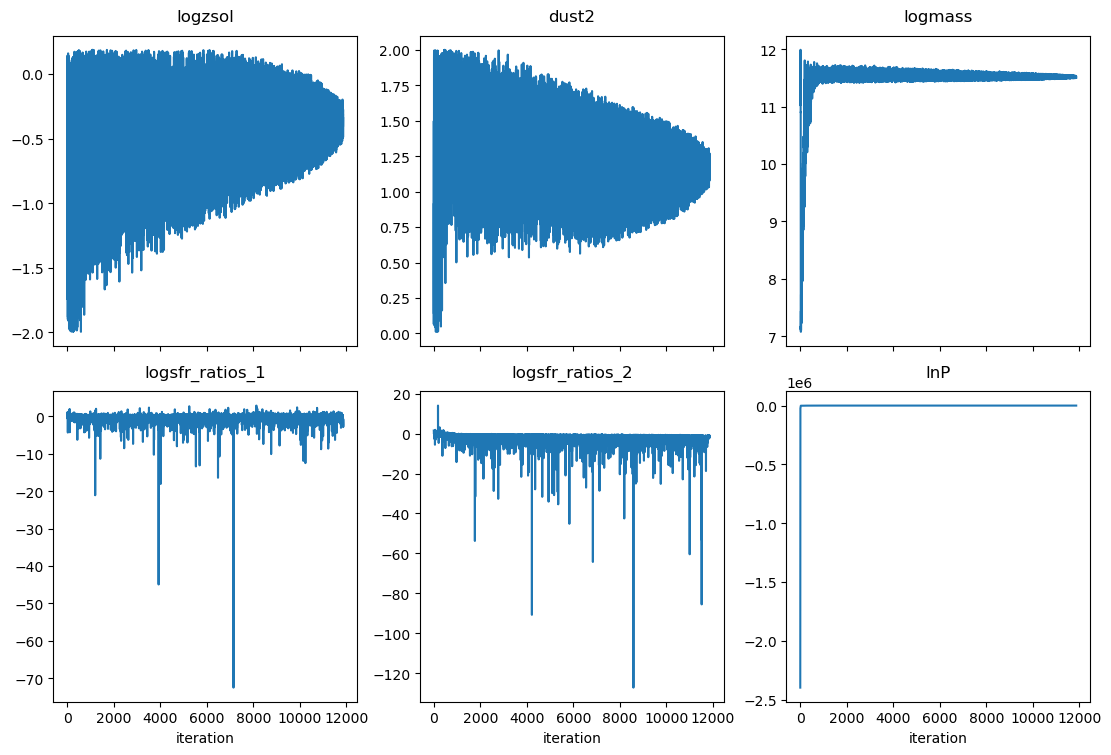

In [9]:
tracefig = reader.traceplot(res)

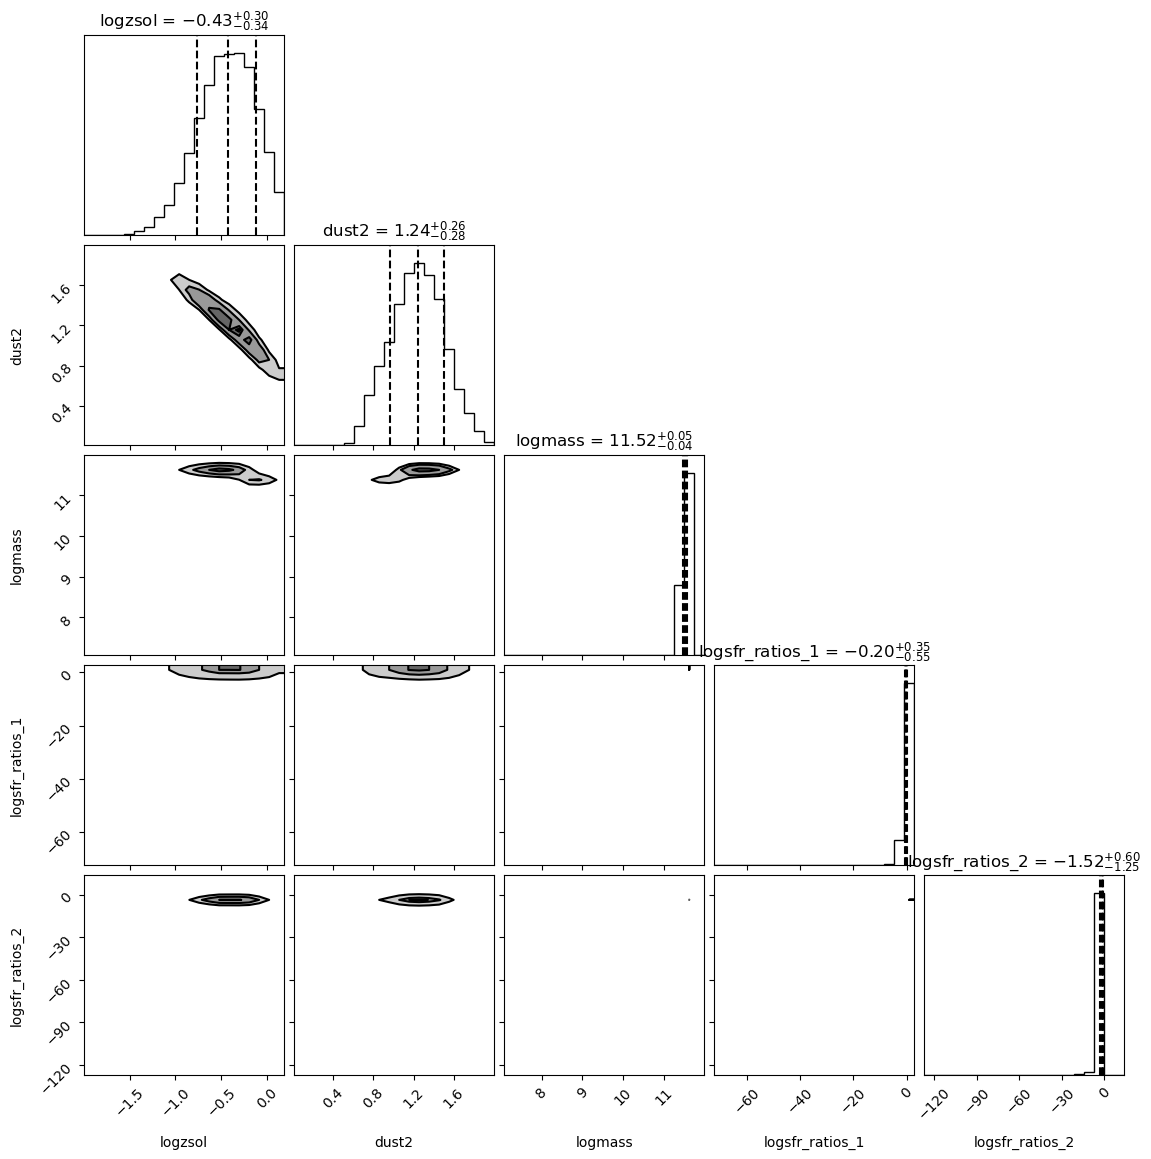

In [10]:
cornerfig = reader.subcorner(res)

{'parameter': array([-0.25280453,  1.12705769, 11.50515316, -0.08057467, -1.22923549]),
 'photometry': array([8.01160194e-09, 2.86191406e-08, 6.63544751e-08, 1.17082454e-07,
        9.61954531e-08]),
 'restframe_wavelengths': array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
        1.000e+08]),
 'spectrum': array([ 3.07210941e-11, -3.43851201e-14, -5.79482461e-16, ...,
         1.03763895e-09,  1.03056653e-09,  9.93580956e-10]),
 'mfrac': 0.6187065936130955}

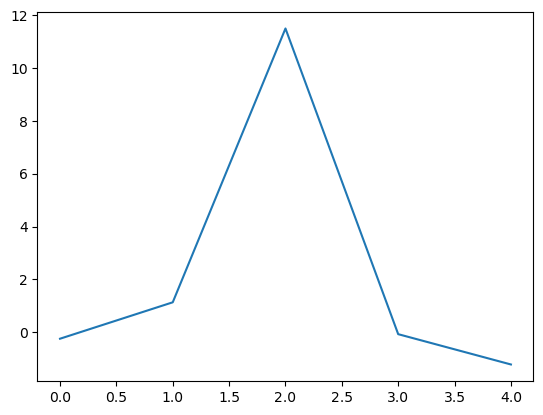

In [11]:
plt.plot(res['bestfit']['parameter'])
res['bestfit']

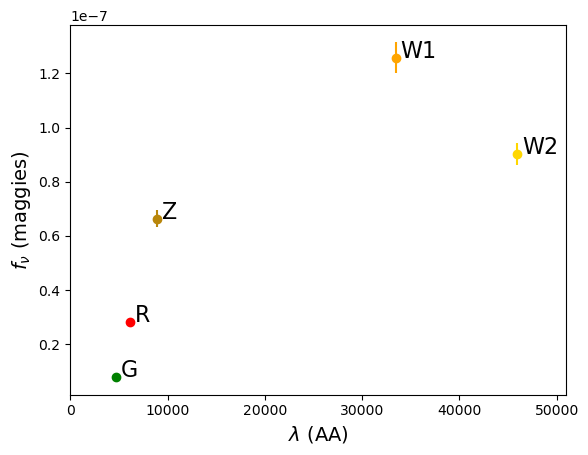

In [32]:
pwave = np.array([f.wave_effective for f in obs["filters"]])
colors=['g', 'r', 'darkgoldenrod', 'orange', 'gold']
labels=['G', 'R', 'Z', 'W1', 'W2']
for i in range(len(pwave)):
    plt.errorbar(pwave[i], obs["maggies"][i], obs["maggies_unc"][i],
                 linestyle="", marker="o", color=colors[i])
    plt.annotate(labels[i], [pwave[i]+500, obs['maggies'][i]], fontsize=16)
plt.xlim([0, 51000])
plt.xlabel(r"$\lambda$ (AA)", fontsize=14)
plt.ylabel(r"$f_\nu$ (maggies)", fontsize=14)
plt.savefig("figs/example_photom.png", bbox_inches='tight')

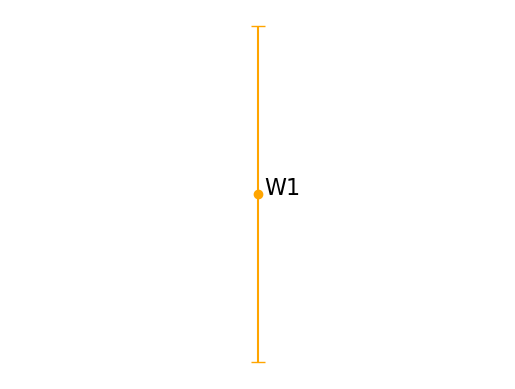

In [41]:
fig, ax = plt.subplots()
ax.errorbar(pwave[3], obs['maggies'][3], obs['maggies_unc'][i], 
             marker='o', color=colors[3], capsize=5)
ax.annotate(labels[3], [pwave[3]+50, obs['maggies'][3]], fontsize=16)
ax.axis('off')
plt.savefig('figs/example_augment.png', bbox_inches='tight')

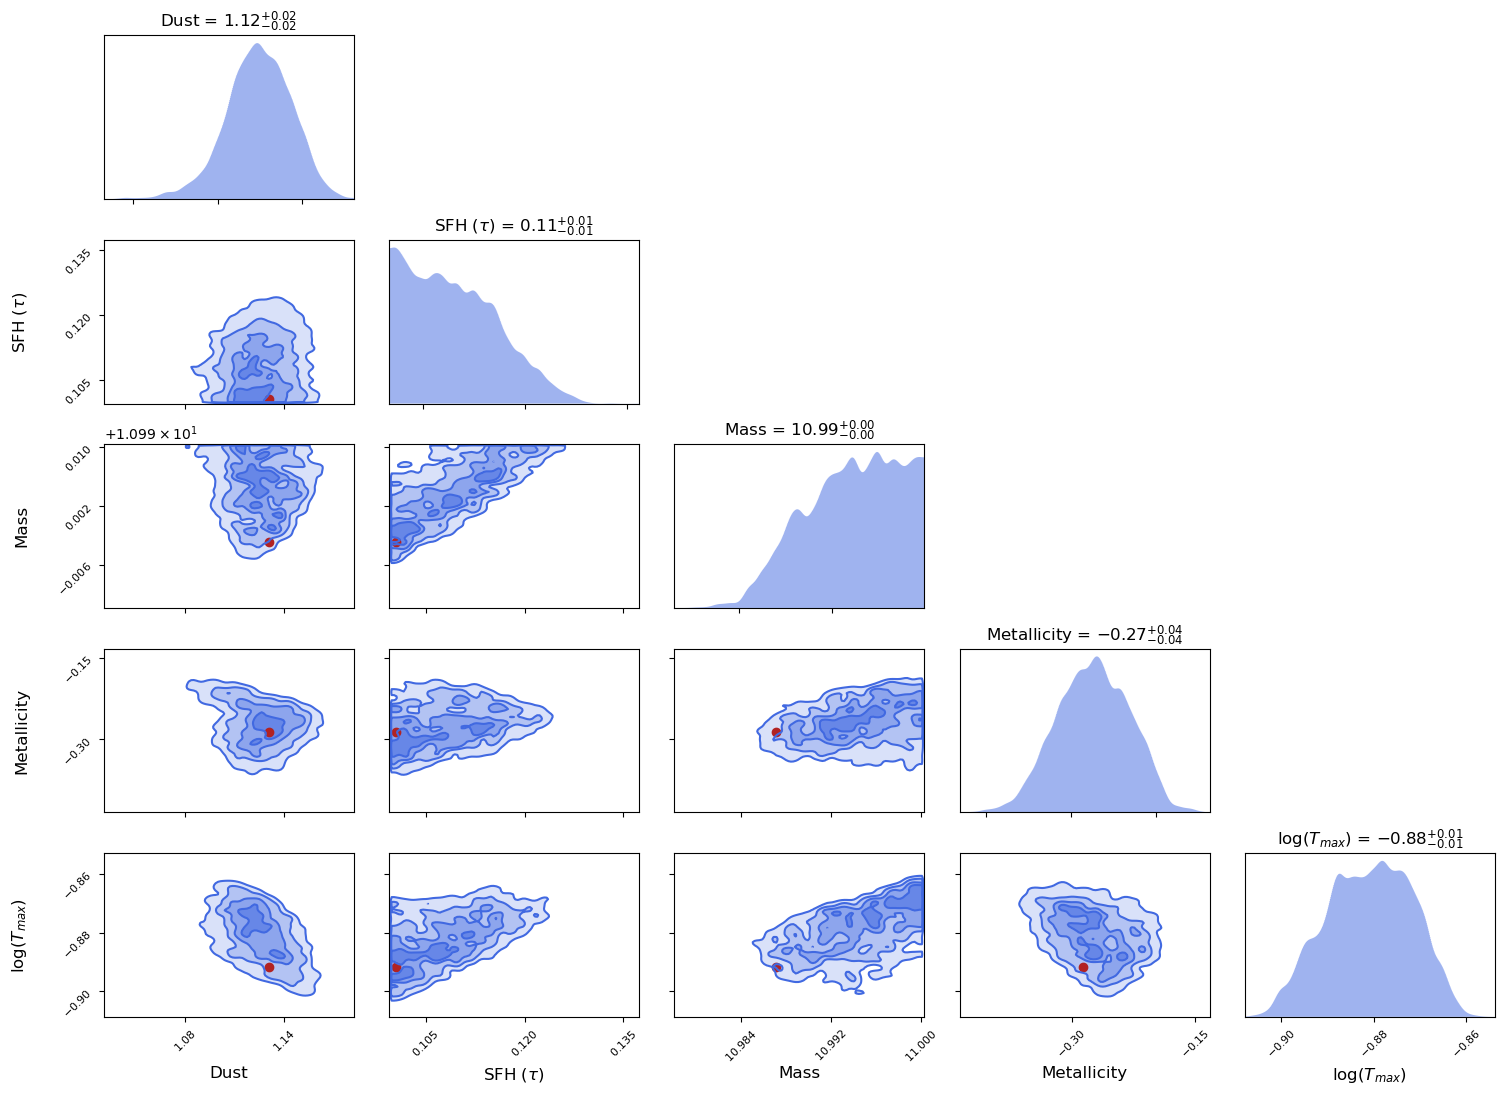

In [16]:
out, out_obs, out_model = reader.results_from(lens_file)
import matplotlib.pyplot as pl
from prospect.plotting import corner
nsamples, ndim = out["chain"].shape
cfig, axes = pl.subplots(ndim, ndim, figsize=(15,11))
axes = corner.allcorner(out["chain"].T, ['Dust', r'SFH ($\tau$)', 'Mass', 'Metallicity', 'log($T_{max}$)'], axes, weights=out["weights"], color="royalblue", show_titles=True)

from prospect.plotting.utils import best_sample
pbest = best_sample(out)
corner.scatter(pbest[:, None], axes, color="firebrick", marker="o")
plt.tight_layout()
# plt.suptitle("Prospector fit for IPTF16geu", fontsize=20)
cfig.patch.set_facecolor('white')
plt.savefig('corner_lens.png', bbox_inches='tight')

In [20]:
for ax in axes.flatten():
    print(ax.get_xlim(), ax.get_ylim())

(1.033035495944365, 1.18036884752965) (0.0, 0.006507153626329529)
(0.0, 1.0) (0.0, 1.0)
(0.0, 1.0) (0.0, 1.0)
(0.0, 1.0) (0.0, 1.0)
(0.0, 1.0) (0.0, 1.0)
(1.030825495670586, 1.1825788478034291) (0.09944812103421587, 0.13738883445224803)
(0.10000065569564354, 0.13683629979082032) (0.0, 0.00500797044852082)
(0.0, 1.0) (0.0, 1.0)
(0.0, 1.0) (0.0, 1.0)
(0.0, 1.0) (0.0, 1.0)
(1.030825495670586, 1.1825788478034291) (10.978134610942998, 11.000323045692708)
(0.09944812103421587, 0.13738883445224803) (10.978134610942998, 11.000323045692708)
(10.978457743487896, 10.999999913147807) (0.0, 0.0040559254851426085)
(0.0, 1.0) (0.0, 1.0)
(0.0, 1.0) (0.0, 1.0)
(1.030825495670586, 1.1825788478034291) (-0.4354354536723662, -0.13294594697011114)
(0.09944812103421587, 0.13738883445224803) (-0.4354354536723662, -0.13294594697011114)
(10.978134610942998, 11.000323045692708) (-0.4354354536723662, -0.13294594697011114)
(-0.43103026668155664, -0.13735113396092066) (0.0, 0.00561608776534786)
(0.0, 1.0) (0.0, 1.0

In [35]:
res, obs, model = reader.results_from('unlensed_param_csp.h5')
res['weights']

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.09025292e-05, 6.14017801e-05, 6.28331874e-05])

In [8]:
out['theta_labels']

['dust2', 'tau', 'massmet_1', 'massmet_2', 'logtmax']

Text(0, 0.5, '$\\chi_{\\rm best}$')

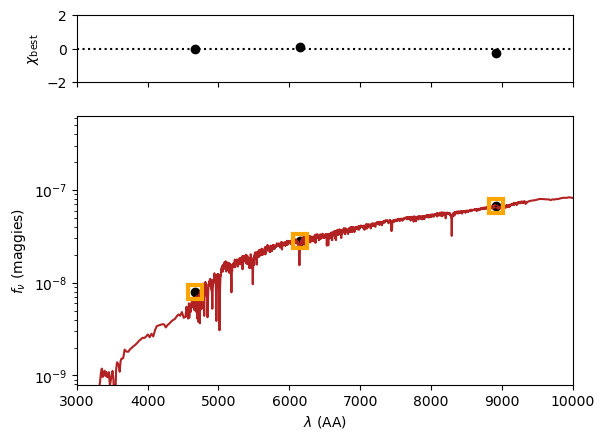

In [9]:
import matplotlib.pyplot as pl
sfig, saxes = pl.subplots(2, 1, gridspec_kw=dict(height_ratios=[1, 4]), sharex=True)
ax = saxes[1]
pwave = np.array([f.wave_effective for f in out_obs["filters"]])
# plot the data
ax.plot(pwave, out_obs["maggies"], linestyle="", marker="o", color="k")
ax.errorbar(pwave,  out_obs["maggies"], out_obs["maggies_unc"], linestyle="", color="k", zorder=10)
ax.set_ylabel(r"$f_\nu$ (maggies)")
ax.set_xlabel(r"$\lambda$ (AA)")
ax.set_xlim(3e3, 1e4)
ax.set_ylim(out_obs["maggies"].min() * 0.1, out_obs["maggies"].max() * 5)
ax.set_yscale("log")

# get the best-fit SED
bsed = out["bestfit"]
ax.plot(bsed["restframe_wavelengths"] * (1+out_model.params["zred"]), bsed["spectrum"], color="firebrick", label="MAP sample")
ax.plot(pwave, bsed["photometry"], linestyle="", marker="s", markersize=10, mec="orange", mew=3, mfc="none")

ax = saxes[0]
chi = (out_obs["maggies"] - bsed["photometry"]) / out_obs["maggies_unc"]
ax.plot(pwave, chi, linestyle="", marker="o", color="k")
ax.axhline(0, color="k", linestyle=":")
ax.set_ylim(-2, 2)
ax.set_ylabel(r"$\chi_{\rm best}$")

In [12]:
# iptf_data = pd.read_csv("iptf16geu.dat")
# iptf_data

NameError: name 'pd' is not defined

In [13]:
# real_mags = np.array([iptf_data["dered_mag_"+b] for b in ['g', 'r', 'z', 'w1', 'w2']])
# real_fluxes = 10**((22.5 - real_mags)/2.5)*1e-9
# plt.plot(pwave, real_fluxes, linestyle='', marker='*', color='r')
# plt.xscale('log')
# plt.yscale('log')

NameError: name 'iptf_data' is not defined

NameError: name 'real_fluxes' is not defined

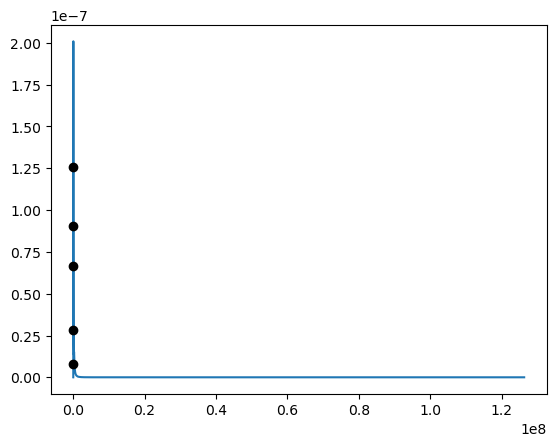

In [14]:
# plt.plot(bsed["restframe_wavelengths"]*(1+out_model.params['zred']), bsed['spectrum'])
# pwave = np.array([f.wave_effective for f in out_obs["filters"]])
# plt.plot(pwave, out_obs["maggies"], linestyle="", marker="o", color="k")
# plt.plot(pwave, real_fluxes, linestyle='', marker='*', color='r')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([2e3, 5e4])
# plt.ylim([1e-10, 1e-6])

In [13]:
res['bestfit']

{'parameter': array([ 1.13078474,  0.10044985, 10.98712655, -0.28610604, -0.89164486]),
 'photometry': array([7.93885925e-09, 2.83652223e-08, 6.64348514e-08, 1.25673400e-07,
        9.10467462e-08]),
 'restframe_wavelengths': array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
        1.000e+08]),
 'spectrum': array([5.93258836e-63, 5.93258836e-63, 5.93258836e-63, ...,
        7.83807945e-12, 7.84257895e-12, 7.84782525e-12]),
 'mfrac': 0.6558063083444264}

In [14]:
bsed['restframe_wavelengths']

array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08])

In [15]:
from prospect.sources import CSPSpecBasis
sps = CSPSpecBasis(zcontinuous=1)

(1e-10, 1e-06)

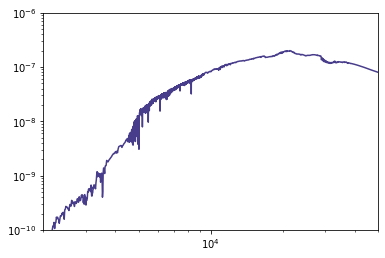

In [23]:
from prospect.plotting.utils import sample_posterior
# Here we fairly and randomly choose a posterior sample
p = sample_posterior(out["chain"], weights=out["weights"], nsample=1)
# show this sample in the corner plot
corner.scatter(p.T, axes, color="darkslateblue", marker="o")
# regenerate the spectrum and plot it
spec, phot, mfrac = model.predict(p[0], obs=out_obs, sps=sps)
fig, ax = plt.subplots()
ax.plot(sps.wavelengths * (1+out_model.params['zred']), spec, color="darkslateblue", label="posterior sample")
ax.set_xscale('log')
ax.set_yscale('log')

plt.xlim([2e3, 5e4])
plt.ylim([1e-10, 1e-6])

# Testing NOAO data grab

In [2]:
from dl import queryClient as qc, helpers
from dl import authClient as ac
from dl import storeClient as sc
from dl.helpers.utils import convert
import pandas as pd
import numpy as np

In [3]:
bands = ['g', 'r', 'z', 'w1', 'w2']
trac_cols = ['ls_id', 'ra', 'dec', 'type'] \
            + ['dered_mag_'+b for b in bands] \
            + ['dered_flux_'+b for b in bands] \
            + ['snr_'+b for b in bands] \
            + ['flux_ivar_'+b for b in bands] \
            + ['dchisq_'+str(i) for i in range(1,6)] \
            + ['rchisq_'+b for b in bands] \
            + ['sersic', 'sersic_ivar'] \
            + ['psfsize_g', 'psfsize_r', 'psfsize_z'] \
            + ['shape_r', 'shape_e1', 'shape_e2'] \
            + ['shape_r_ivar', 'shape_e1_ivar', 'shape_e2_ivar']
phot_z_cols = ['z_phot_median', 'z_phot_std', 'z_spec']

query_cols = ','.join(['trac.'+col for col in trac_cols])+',' \
                +','.join(['phot_z.'+col for col in phot_z_cols])

In [4]:
ra, dec, radius = 145.87318870255623, -2.8121082915368025, 0.0002777777778
data_type, limit = None, 1

In [5]:
# Set up basic query
query =[f"""SELECT {query_cols} FROM ls_dr9.tractor AS trac 
INNER JOIN ls_dr9.photo_z AS phot_z ON trac.ls_id = phot_z.ls_id 
WHERE (q3c_radial_query(ra,dec,{ra},{dec},{radius})) """,
f""" ORDER BY q3c_dist({ra}, {dec}, trac.ra, trac.dec) ASC""",
f""" LIMIT {limit}"""]
# Add data type, if specified
if data_type is not None:
    query.insert(1,f""" AND (type = '{data_type}') """)
# Join full query
query = ''.join(query)

In [6]:
query

'SELECT trac.ls_id,trac.ra,trac.dec,trac.type,trac.dered_mag_g,trac.dered_mag_r,trac.dered_mag_z,trac.dered_mag_w1,trac.dered_mag_w2,trac.dered_flux_g,trac.dered_flux_r,trac.dered_flux_z,trac.dered_flux_w1,trac.dered_flux_w2,trac.snr_g,trac.snr_r,trac.snr_z,trac.snr_w1,trac.snr_w2,trac.flux_ivar_g,trac.flux_ivar_r,trac.flux_ivar_z,trac.flux_ivar_w1,trac.flux_ivar_w2,trac.dchisq_1,trac.dchisq_2,trac.dchisq_3,trac.dchisq_4,trac.dchisq_5,trac.rchisq_g,trac.rchisq_r,trac.rchisq_z,trac.rchisq_w1,trac.rchisq_w2,trac.sersic,trac.sersic_ivar,trac.psfsize_g,trac.psfsize_r,trac.psfsize_z,trac.shape_r,trac.shape_e1,trac.shape_e2,trac.shape_r_ivar,trac.shape_e1_ivar,trac.shape_e2_ivar,phot_z.z_phot_median,phot_z.z_phot_std,phot_z.z_spec FROM ls_dr9.tractor AS trac \nINNER JOIN ls_dr9.photo_z AS phot_z ON trac.ls_id = phot_z.ls_id \nWHERE (q3c_radial_query(ra,dec,145.87318870255623,-2.8121082915368025,0.0002777777778))  ORDER BY q3c_dist(145.87318870255623, -2.8121082915368025, trac.ra, trac.dec) A

In [6]:
# Send query to database
result10 = qc.query(sql=query) # result as string
data = convert(result10, "pandas") # result as dataframe

In [20]:
data.iloc[0].values

array([9906620417378707, 145.87318870255623, -2.8121082915368025, 'SER',
       18.29301, 16.83015, 16.049856, 15.863915, 16.240017, 48.17214,
       185.3273, 380.23962, 451.26718, 319.14896, 244.62286, 450.31375,
       524.02527, 264.77768, 111.61525, 34.236214, 7.145992, 2.113325,
       0.349898, 0.123534, 319191.66, 478060.84, 528328.44, 479850.56,
       532780.9, 0.985614, 1.252352, 1.806344, 2.92393, 1.004218, 6,
       6215.8916, 1.281752, 1.127604, 1.119366, 6.92587, 0.025377,
       -0.126624, 4773.49, 204092.06, 387820.84, 0.25567, 0.006779, -99],
      dtype=object)

# Going through the tutorial here: https://prospect.readthedocs.io/en/latest/quickstart.html

In [8]:
import fsps
import dynesty
import sedpy
import h5py, astropy
import numpy as np

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
bands = "ugriz"
mcol = [f"cModelMag_{b}" for b in bands]
ecol = [f"cModelMagErr_{b}" for b in bands]
cat = SDSS.query_crossid(SkyCoord(ra=204.46376, dec=35.79883, unit="deg"), 
                         data_release=16, photoobj_fields=mcol + ecol + ["specObjID"])
shdus = SDSS.get_spectra(plate=2101, mjd=53858, fiberID=220)[0]
assert int(shdus[2].data["SpecObjID"][0]) == cat[0]["specObjID"]

/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [10]:
from sedpy.observate import load_filters
from prospect.utils.obsutils import fix_obs

filters = load_filters([f"sdss_{b}0" for b in bands])
maggies = np.array([10**(-0.4 * cat[0][f"cModelMag_{b}"]) for b in bands])
magerr = np.array([cat[0][f"cModelMagErr_{b}"] for b in bands])
magerr = np.clip(magerr, 0.05, np.inf)

obs = dict(wavelength=None, spectrum=None, unc=None, redshift=shdus[2].data[0]["z"],
           maggies=maggies, maggies_unc=magerr * maggies / 1.086, filters=filters)
obs = fix_obs(obs)

In [11]:
from prospect.models.templates import TemplateLibrary
from prospect.models import SpecModel
model_params = TemplateLibrary["parametric_sfh"]
model_params.update(TemplateLibrary["nebular"])
model_params["zred"]["init"] = obs["redshift"]

model = SpecModel(model_params)
assert len(model.free_params) == 5
print(model)

:::::::
<class 'prospect.models.sedmodel.SpecModel'>

Free Parameters: (name: prior) 
-----------
  mass: <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  tage: <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)
  tau: <class 'prospect.models.priors.LogUniform'>(mini=0.1,maxi=30)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred: [0.07260209] 
  sfh: [4] 
  imf_type: [2] 
  dust_type: [0] 
  add_neb_emission: [ True] 
  add_neb_continuum: [ True] 
  nebemlineinspec: [ True] 
  gas_logz: [0.] <function stellar_logzsol at 0x7f1c987ae700>
  gas_logu: [-2.] 


In [12]:
noise_model = (None, None)

In [13]:
from prospect.sources import CSPSpecBasis
sps = CSPSpecBasis(zcontinuous=1)
print(sps.ssp.libraries)

(b'mist', b'miles', b'DL07')


In [7]:
current_parameters = ",".join([f"{p}={v}" for p, v in zip(model.free_params, model.theta)])
print(current_parameters)
spec, phot, mfrac = model.predict(model.theta, obs=obs, sps=sps)
print(phot / obs["maggies"])

mass=10000000000.0,logzsol=-0.5,dust2=0.6,tage=1.0,tau=1.0
[6.20307375 2.56684774 1.36475995 1.3654112  1.02082463]


In [ ]:
from prospect.fitting import lnprobfn, fit_model
fitting_kwargs = dict(nlive_init=400, nested_method="rwalk", nested_posterior_thresh=0.05)
output = fit_model(obs, model, sps, optimize=False, dynesty=True, lnprobfn=lnprobfn, noise=noise_model, **fitting_kwargs)
result, duration = output["sampling"]

iter: 1531 | batch: 1 | nc: 1 | ncall: 26273 | eff(%):  5.824 | loglstar: 84.461 < 85.576 < 86.204 | logz: 77.615 +/-  0.298 | stop: 20.062    


done dynesty (initial) in 2522.4211633205414s


iter: 3514 | batch: 6 | nc: 31 | ncall: 66184 | eff(%):  5.247 | loglstar: 82.657 < 86.121 < 86.136 | logz: 77.682 +/-  0.190 | stop:  5.382     

In [1]:
# from prospect.io import read_results as reader
# hfile = "quickstart_dynesty_mcmc.h5"
# writer.write_hdf5(hfile, {}, model, obs,
#                  output["sampling"][0], None,
#                  sps=sps,
#                  tsample=output["sampling"][1],
#                  toptimize=0.0)
# res, obs, model = reader.results_from("quickstart_dynesty_mcmc.h5")

In [5]:
import prospect.io.read_results as reader
res, obs, model = reader.results_from("/global/cscratch1/sd/eramey16/data/lensed/Huang21_A/9906602215998531.h5")

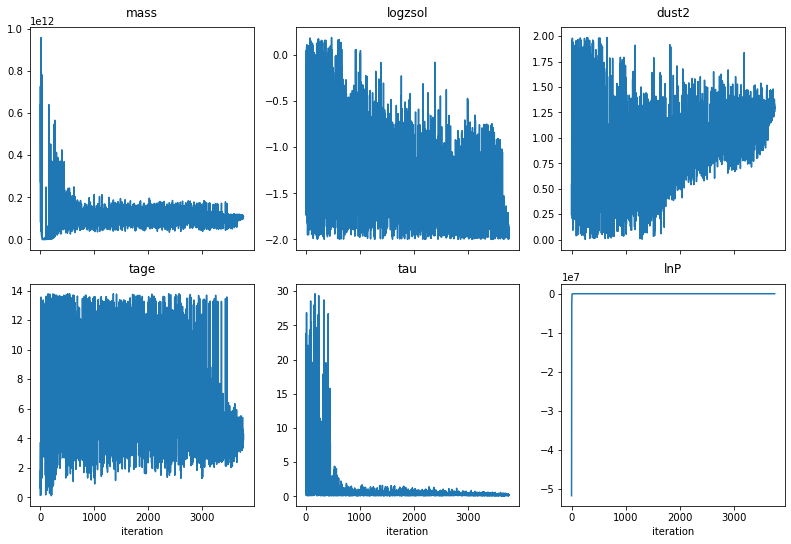

In [2]:
tracefig = reader.traceplot(res)

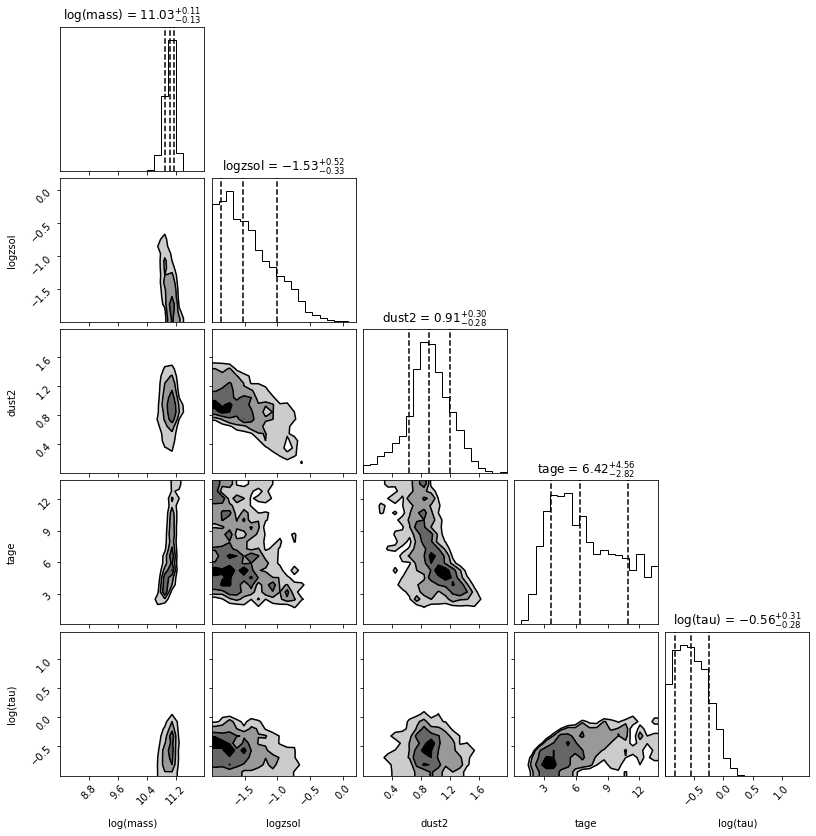

In [3]:
cornerfig = reader.subcorner(res)

In [23]:
import numpy as np
import corner
# np.average(res['chain'][:,1], weights = res['weights'])
x = corner.quantile(res['chain'][:,1], [.16, .5, .84], weights=res['weights'])
x[2] - x[1]

0.516505148971538

In [17]:
import util
import numpy as np
x = np.apply_along_axis(util.calc_quantiles, 0, res['chain'])
x[0,:]

array([ 6.72576820e+10, -1.84833921e+00,  5.74686624e-01,  3.51429645e+00,
        1.48533821e-01])

In [ ]:
import corner
corner.quantile(res['chain'][:,1], q=[.16, .5, .84], weights=res['weights'])

In [10]:
res['weights'].shape

(3761,)

In [42]:
res['chain'].shape

(7265, 5)

In [4]:
res['theta_labels']

['dust2', 'tau', 'massmet_1', 'massmet_2', 'logtmax']

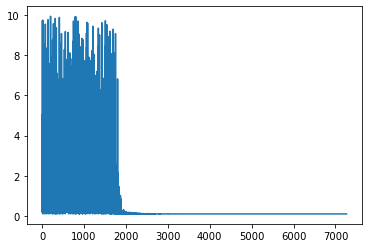

In [46]:
import matplotlib.pyplot as plt
plt.plot(res['chain'][:,1])

{'parameter': array([ 5.17591765e+10, -9.17587862e-01,  9.90926282e-01,  2.01410940e+00,
         1.03836902e-01]),
 'photometry': array([2.93235848e-08, 1.41112189e-07, 2.70035255e-07, 3.65138011e-07,
        4.65379223e-07]),
 'restframe_wavelengths': array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
        1.000e+08]),
 'spectrum': array([ 3.53377759e-11, -3.95704873e-14, -6.66009321e-16, ...,
         1.24305136e-09,  1.21027784e-09,  1.14362239e-09]),
 'mfrac': 0.6409032293191133}

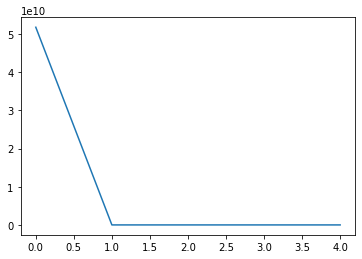

In [59]:
plt.plot(res['bestfit']['parameter'])
res['bestfit']

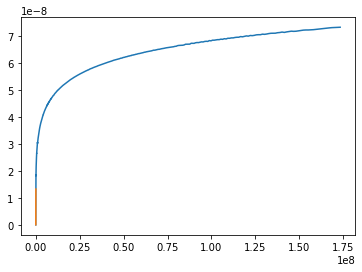

In [22]:
import matplotlib.pyplot as pl
best = res["bestfit"]
a = model.params["zred"] + 1
pl.plot(a * best["restframe_wavelengths"], best['spectrum'], label="MAP spectrum")
if obs['filters'] is not None:
    pwave = [f.wave_effective for f in obs["filters"]]
    pl.plot(pwave, best['photometry'], label="MAP photometry")

In [2]:
res.keys()

dict_keys(['model_params', 'optimizer_duration', 'paramfile_text', 'prospector_version', 'run_params', 'chain', 'efficiency', 'information', 'lnlikelihood', 'lnprobability', 'logvol', 'logz', 'logzerr', 'niter', 'samples_id', 'weights', 'ncall', 'sampling_duration', 'theta_labels', 'bestfit', 'optimization', 'obs', 'model'])

In [67]:
res['bestfit']['photometry']

array([2.93235848e-08, 1.41112189e-07, 2.70035255e-07, 3.65138011e-07,
       4.65379223e-07])

In [62]:
obs['maggies_unc']

array([1.33355883e-09, 6.59884882e-09, 1.23445760e-08, 1.71661214e-08,
       2.03162795e-08])

In [3]:
res['theta_labels']

['dust2', 'tau', 'massmet_1', 'massmet_2', 'logtmax']

In [4]:
obs.keys()

dict_keys(['maggies', 'maggies_unc', 'phot_mask', 'filternames', 'filters', 'logify_spectrum', 'ndof', 'objid', 'phot_wave', 'spectrum', 'unc', 'wavelength'])

In [63]:
obs['maggies']

array([2.89648978e-08, 1.43326996e-07, 2.68124192e-07, 3.72848156e-07,
       4.41269591e-07])

In [75]:
res['chain'].shape

(3761, 5)

In [6]:
model.fixed_params, model.free_params, model.theta

(['zred',
  'mass',
  'logzsol',
  'sfh',
  'tage',
  'imf_type',
  'dust_type',
  'pmetals',
  'dust1',
  'dust_index',
  'add_neb_emission',
  'add_neb_continuum',
  'nebemlineinspec',
  'gas_logz',
  'gas_logu',
  'add_dust_emission'],
 ['dust2', 'tau', 'massmet', 'logtmax'],
 array([0.6, 1. , 8. , 0. , 0.5]))

In [7]:
type(model.params)

dict

In [8]:
x = model.params
x['theta'] = model.theta
x

{'zred': array([0.229126]),
 'mass': array([1.e+10]),
 'logzsol': array([-0.5]),
 'dust2': array([0.6]),
 'sfh': array([4]),
 'tage': array([1]),
 'imf_type': array([1]),
 'dust_type': array([4]),
 'tau': array([1]),
 'massmet': array([8., 0.]),
 'pmetals': array([-99]),
 'logtmax': array([0.5]),
 'dust1': array([0.5]),
 'dust_index': array([0.]),
 'add_neb_emission': array([ True]),
 'add_neb_continuum': array([ True]),
 'nebemlineinspec': array([False]),
 'gas_logz': array([0.]),
 'gas_logu': array([-2.]),
 'add_dust_emission': array([False]),
 'theta': array([0.6, 1. , 8. , 0. , 0.5])}

In [10]:
model.params['mass'][0]

10000000000.0

In [34]:
model.params['massmet']

array([8., 0.])

### H5 file contents (with prospect reader)

* Res
    * model_params
    * optimizer_duration
    * paramfile_text
    * prospector_version
    * run_params
    * chain
    * efficiency
    * information
    * lnlikelihood
    * lnprobability
    * logvol
    * logz
    * logzerr
    * niter
    * samples_id
    * weights
    * ncall
    * sampling_duration
    * theta_labels
    * bestfit
    * optimization
    * obs
    * model
* Obs
    * maggies
    * maggies_unc
    * phot_mask
    * filternames
    * filters
    * logify_spectrum
    * ndof
    * objid
    * phot_wave
    * spectrum
    * unc
    * wavelength
* Model
    * __Free Parameters__
    * dust2 (float)
    * tau (int)
    * massmet (float array) - 2 values in example
    * logtmax (float)
    * __Fixed Parameters__
    * zred (float)
    * mass (float)
    * logzsol (float)
    * sfh (int)
    * tage (int)
    * imf_type (int)
    * dust_type (int)
    * pmetals (int)
    * dust1 (float)
    * dust_index (float)
    * add_neb_emission (bool)
    * add_neb_continuum (bool)
    * nebemlineinspec (bool)
    * gas_logz (float)
    * gas_logu (float)
    * add_dust_emission (bool)
    * __Theta__ (float array)

### Options:
1. Store each HDF5 file as-is with no omissions (this includes the entire spectrum, sampling chain, etc.). Each time we want model parameters we will need to run prospect.io.read_results. (On second thought, I don't even think we can do this one since the results_from() function can ONLY take a filename and not an open file group).
2. Read each HDF5 file with prospect.io.read_results and store the entire thing in an hdf5 file (different structure)
3. Read each HDF5 file with prospect.io.read_results and store only what we need in another file

In [68]:
import h5py
f1 = h5py.File("test.h5", 'a')

In [71]:
a = np.array([[0,0,0],[1,1,1]])
f1.create_dataset("A", data=a)

<HDF5 dataset "A": shape (2, 3), type "<i8">

In [2]:
list(f1.keys())

['bestfit', 'obs', 'sampling']

In [ ]:
f2 = h5py.File("../data/db_test/test.h5", 'w')
x = f2.create_group('A')
f1.copy('bestfit', f2['A/C'])
f2.close()
f1.close()

In [ ]:
f = h5py.File("../data/db_test/test.h5", 'r')
f['A/C'].keys()

<KeysViewHDF5 ['bestfit']>

In [10]:
import pandas as pd
x = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})
y = pd.DataFrame({'a':[3,2,1,0], 'c':[1,2,3,4]})
x.merge(y, on='a')

,a,b,c
0,1,4,3
1,2,5,2
2,3,6,1


In [14]:
import psycopg2
conn = psycopg2.connect('host = nerscdb03.nersc.gov dbname=lensed_db user=lensed_db_admin')
cur = conn.cursor()

with open('../data/db_test/emily_tbl.dat') as f:
    ml_a = f.read()

cur.execute(ml_a)
conn.commit()

cur.close()
conn.close()

In [18]:
from util import collect_gals, collect_h5
basic = collect_gals("../data/lensed/ML_A")
prospector = collect_h5("../data/lensed/ML_A")

In [1]:
from sqlalchemy import create_engine
import psycopg2
engine = create_engine('postgresql+psycopg2://lensed_db_admin@nerscdb03.nersc.gov/lensed_db')

In [25]:
with engine.connect() as conn:
    print(engine.dialect.has_table(conn, 'unlensed'))

True


In [9]:
import pandas as pd
import os
import util
from util import collect_gals
def fix_dir(path):
    # Collect all galaxies' data
    data = collect_gals(path)
    # Find lensed result
    for i,line in data.iterrows():
        df = data.loc[[i]]
        # Get other csv file
        filename = os.path.join(path, str(line.ls_id)+'.csv')
        if os.path.exists(filename):
            lensed = pd.read_csv(filename).iloc[0]['lensed']
            df['lensed'] = lensed
            df.to_csv(filename, index=False)

In [2]:
import pandas as pd
import util
import os
import glob
# Get generic path for filenames
path = '../data/dr9_training/dr9_unlensed'
key = os.path.join(path, 'galaxies_*.csv')
filenames = glob.glob(key)
for file in filenames:
    try:
        df = pd.read_csv(file, index_col=0, names=util.cols_new)
        ls_id = df['ls_id'][0]
        lensed_file = os.path.join(path, f'{ls_id}.csv')
        if os.path.exists(lensed_file):
            lensed = pd.read_csv(lensed_file)
            df['lensed'] = lensed['lensed'][0]
        df.to_csv(lensed_file, index=False)
    except:
        print(file)
    

../data/dr9_training/dr9_unlensed/galaxies_03:06:23.996960.csv
../data/dr9_training/dr9_unlensed/galaxies_02:50:06.186429.csv


In [1]:
from util import save_to_db
save_to_db('../data/dr9_training/dr9_unlensed', db_name='unlensed', delete=True)

# Getting Reacquainted 10/14/22

In [1]:
from util import save_to_db, read_table
save_to_db('../data/dr9_training/dr9_unlensed/', db_name='unlensed', delete=False)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Using Taskfarmer

In [1]:
import pandas as pd
import csv

In [7]:
galaxies = pd.read_csv("../data/first_query.txt", nrows=1000)

In [8]:
shft_cmd = "shifter --image=audreykoz/gradient:latest" \
" --volume='/global/cscratch1/sd/eramey16/data/testrun:/gradient_boosted/exports'" \
" /opt/conda/bin/python /gradient_boosted/classify.py -r {} -d {}"

In [9]:
galaxies['run'] = [shft_cmd.format(a,b) for a,b in zip(galaxies.ra, galaxies.dec)]

In [10]:
galaxies

,ls_id,ra,dec,run
0,8796115184194014,149.285304,1.345116,shifter --image=audreykoz/gradient:latest --vo...
1,8796115184193402,149.273901,1.313647,shifter --image=audreykoz/gradient:latest --vo...
2,8796115184193181,149.291823,1.303267,shifter --image=audreykoz/gradient:latest --vo...
3,8796115278499067,149.127949,1.530269,shifter --image=audreykoz/gradient:latest --vo...
4,8796115278498990,149.121014,1.526591,shifter --image=audreykoz/gradient:latest --vo...
...,...,...,...,...
995,8796115278693161,149.765329,1.415705,shifter --image=audreykoz/gradient:latest --vo...
996,8796115278693010,149.784284,1.406019,shifter --image=audreykoz/gradient:latest --vo...
997,8796115278693406,149.765189,1.427825,shifter --image=audreykoz/gradient:latest --vo...
998,8796115278693488,149.783395,1.435049,shifter --image=audreykoz/gradient:latest --vo...


In [11]:
galaxies['run'].to_csv('../data/tasks.txt', sep='\t', header=False, index=False, quoting=3)

In [38]:
galaxies = pd.read_csv("../data/masterlens.tsv", skiprows=1, sep='\t')

In [41]:
galaxies.columns = galaxies.columns.str.replace('"', '')
galaxies.columns = galaxies.columns.str.strip()
# galaxies.apply(lambda s: s.str.replace('"', ""))
# galaxies.apply(lambda s: s.str.strip())
galaxies.columns

Index(['# system_name', 'discovery_date', 'alternate_name', 'kind_acronym',
       'discovery_acronym', 'reference_identifier', 'ra_hrs', 'ra_mins',
       'ra_secs', 'ra_coord', 'dec_degrees', 'dec_arcmin', 'dec_arcsec',
       'dec_coord', 'lensgrade', 'number_images', 'theta_e', 'theta_e_err',
       'theta_e_quality', 'z_lens', 'z_lens_err', 'z_lens_quality', 'z_source',
       'z_source_err', 'z_source_quality', 'vdisp', 'vdisp_err', 'filter_lens',
       'filter_source', 'fluxes', 'mag_lens', 'mag_source', 'morphology',
       'has_sdss', 'sdss_link', 'has_adsabs', 'adsabs_link', 'apod_link',
       'vett_status', 'released_status', 'hidden_status', 'vetted', 'released',
       'hidden', 'graphic_status', 'equinox', 'sdss_ObjID', 'sdss_specObjID',
       'time_delay0', 'time_delay1', 'lens_name'],
      dtype='object')

In [48]:
radec = galaxies[['ra_coord', 'dec_coord']]
radec.columns = ['ra', 'dec']
radec.to_csv('coords_A.csv', index=False)

In [33]:
galaxies.iloc[0]['discovery_date']

' "2008-08-01"'

In [23]:
galaxies = pd.read_csv('../data/lensed/Huang21_C/Huang21_C.csv')
galaxies.columns = [x.lower() for x in galaxies.columns]

In [24]:
radec = galaxies[['ra', 'dec']]

In [25]:
with open("../data/lensed/all_lensed/galaxies.csv", 'a') as file:
    radec.to_csv(file, index=False, header=False)

# Aggregate outputs

In [1]:
import glob
import pandas as pd
import numpy as np

In [2]:
filenames = glob.glob('../data/testrun/[0-9]*.csv')

In [3]:
data = []
for file in filenames:
    data.append(pd.read_csv(file))

data = pd.concat(data, ignore_index = True)

In [4]:
data

,ls_id,lensed
0,8796115184321665,1
1,8796115089953404,0
2,8796115089888045,1
3,8796115089887865,0
4,8796115278562997,0
...,...,...
968,8796115184323951,0
969,8796115184324356,1
970,8796115278564472,0
971,8796115089888210,0


In [5]:
np.sum(data['lensed'])

568

In [6]:
data.to_csv('../data/testrun/total_lensed.csv', index=False)

In [1]:
from util import collect_lensed, collect_gals

In [2]:
data = collect_lensed('../data/testrun')

Total lensed: 568 / 973


In [4]:
data = collect_lensed('../data/lensed/ML_A')

Total lensed: 78 / 199


In [5]:
data = collect_lensed('../data/lensed/ML_B')

Total lensed: 26 / 56


In [6]:
data = collect_lensed('../data/lensed/ML_C')

Total lensed: 34 / 62


In [7]:
data = collect_lensed('../data/lensed/Huang21_A')

Total lensed: 106 / 206


In [8]:
data = collect_lensed('../data/lensed/Huang21_B')

Total lensed: 117 / 191


In [9]:
data = collect_lensed('../data/lensed/Huang21_C')

Total lensed: 572 / 843


In [2]:
data = collect_gals('../data/testrun')

In [5]:
data

,ls_id,ra,dec,type,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,unc_g,...,unc_w2,z_phot_median,z_phot_std,z_spec,dered_flux_g,dered_flux_r,dered_flux_z,dered_flux_w1,dered_flux_w2,tag
0,8796115089951731,149.841244,1.018637,DEV,23.201754,22.356958,22.289858,23.750008,NaN,0.065150,...,-0.690722,0.432835,0.178050,-99.0000,0.523961,1.140819,1.213548,0.316226,-2.148673,tst
1,8796115278562038,149.421547,1.406107,DEV,21.702497,21.372538,21.452879,NaN,NaN,0.045546,...,-0.140871,0.231661,0.239397,-99.0000,2.084496,2.824783,2.623304,-1.900767,-15.072433,tst
2,8796115184194653,149.375348,1.374884,DEV,24.719746,23.504185,21.305895,19.629570,20.209246,0.249244,...,0.177981,0.999594,0.104023,-99.0000,0.129450,0.396575,3.003602,14.066046,8.247109,tst
3,8796115278562014,149.376562,1.402851,DEV,25.426490,23.366247,21.207819,19.580494,20.832440,0.670884,...,0.327308,0.956415,0.093704,-99.0000,0.067516,0.450299,3.287548,14.716435,4.645409,tst
4,8796115278498251,149.219260,1.492591,DEV,22.977180,23.026808,22.552841,22.025452,20.894102,0.048105,...,0.325019,1.210540,0.341453,-99.0000,0.644359,0.615569,0.952497,1.548173,4.388934,tst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,8796115184258833,149.580977,1.301445,DEV,24.912098,23.390469,21.305450,19.205685,19.941689,0.237642,...,0.133211,0.972528,0.108875,-99.0000,0.108433,0.440364,3.004832,20.783869,10.551753,tst
1090,8796115184255958,149.635783,1.165474,DEV,24.445368,22.180323,20.618673,19.200708,20.230045,0.245999,...,0.183343,0.708734,0.040529,-99.0000,0.166668,1.342366,5.656280,20.879320,8.090620,tst
1091,8796115278564395,149.492409,1.509756,DEV,23.117222,21.776560,20.934420,19.321192,19.791760,0.104514,...,0.131365,0.594347,0.080693,0.6576,0.566384,1.947045,4.228945,18.686295,12.114234,tst
1092,8796115089952319,149.813087,1.044961,DEV,19.671507,19.266603,19.040766,19.442953,20.152079,0.004291,...,0.175434,0.088458,0.035541,-99.0000,13.533103,19.649826,24.193240,16.703941,8.692971,tst


# Random data processing

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import collect_gals, clean_and_calc
seed = 42

import matplotlib as mpl
import matplotlib.transforms as transforms
plt.rcParams.update({'font.size': 20})

import seaborn as sns

In [9]:
use_cols = ['dered_mag_g', 'dered_mag_r', 'dered_mag_z', 'dered_mag_w1', 'dered_mag_w2', 
            'z_phot_median', 'min_dchisq']
dchisq_labels = [f'dchisq_{i}' for i in range(1,6)]
rchisq_labels = ['rchisq_g', 'rchisq_r', 'rchisq_z', 'rchisq_w1', 'rchisq_w2']

In [3]:
# one_gal = collect_gals('../data/special_run') # TODO: NEEDS TO BE RERUN
# one_gal = clean_and_calc(one_gal)
# one_gal.to_csv('../data/special_run/galaxy_info.csv', index=False)

### Lensed data

In [4]:
# Collect data from lensed galaxy run
# data2 = collect_gals("../data/lensed/all_lensed") # Data is in DB now
# data2['lensed'] = True

# data2 = clean_and_calc(data2)
# data2

In [6]:
# data2.to_csv("../data/dr9_training/dr9_lensed.csv", index=False)

In [6]:
# lensed = data2[use_cols]
# lensed.to_csv("../data/lensed.dat", index=False)

(19.06381688084112, 1.4524781577238661)

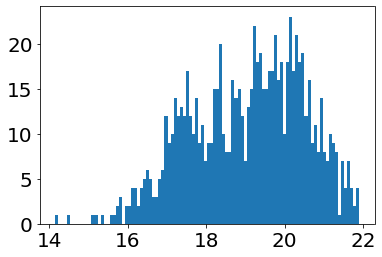

In [7]:
_ = plt.hist(data2['dered_mag_r'], bins=100)
mu, sigma = np.mean(data2['dered_mag_r']), np.std(data2['dered_mag_r'])
mu, sigma

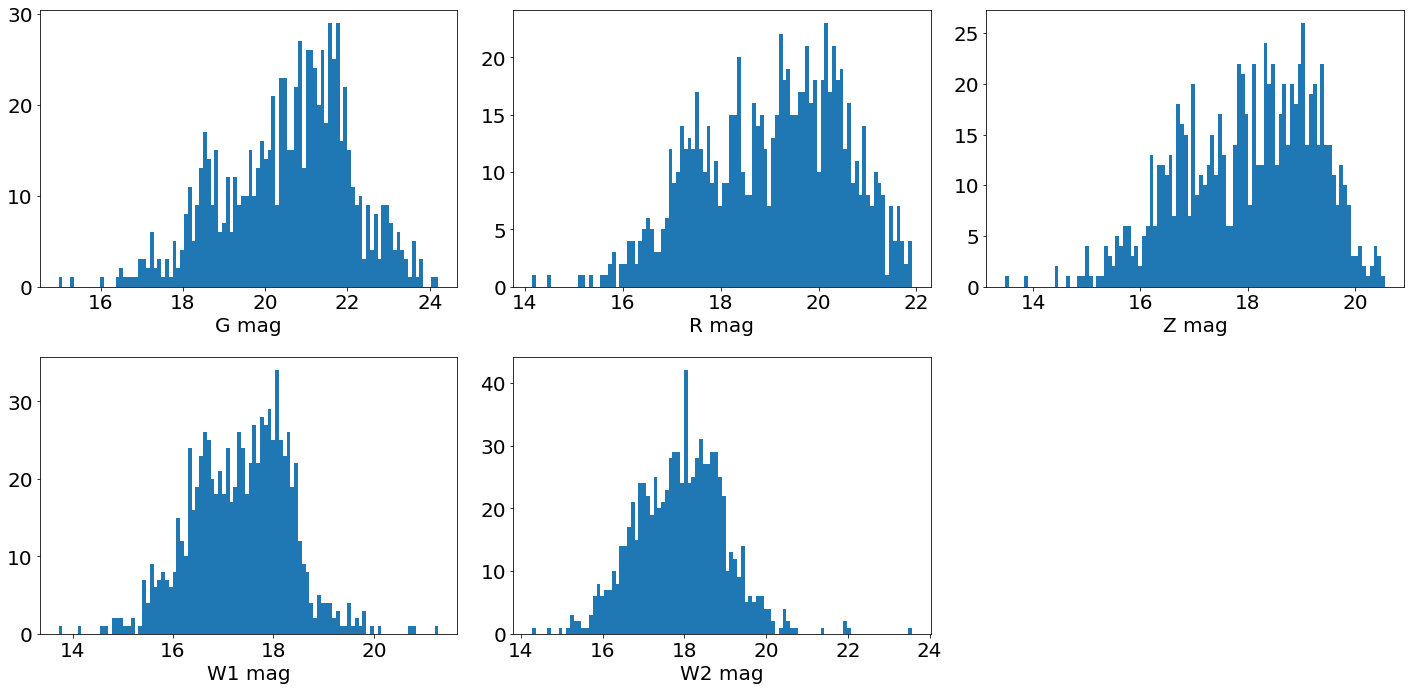

In [8]:
data = data2

fig, axes = plt.subplots(2, 3, figsize=(20,10))

axes[0,0].hist(data['dered_mag_g'], bins=100)
axes[0,0].set_xlabel('G mag')

axes[0,1].hist(data['dered_mag_r'], bins=100)
axes[0,1].set_xlabel('R mag')

axes[0,2].hist(data['dered_mag_z'], bins=100)
axes[0,2].set_xlabel('Z mag')

axes[1,0].hist(data['dered_mag_w1'], bins=100)
axes[1,0].set_xlabel('W1 mag')

axes[1,1].hist(data['dered_mag_w2'], bins=100)
axes[1,1].set_xlabel('W2 mag')

axes[1,2].axis('off')
plt.tight_layout()
plt.savefig('lensed_magnitudes.png', bbox_inches='tight')

### Unlensed

In [10]:
# Read full DR9 set
data1 = pd.read_csv('../data/dr9_training/dr9_7deg.csv')
# Input lensing
data1['lensed'] = False

data1 = clean_and_calc(data1)
data1

/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ls_id,ra,dec,type,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_flux_g,...,r/w1,r/w2,flux_sigma_g,flux_sigma_r,flux_sigma_z,flux_sigma_w1,flux_sigma_w2,min_dchisq,sum_rchisq,abs_mag_r
3,9906620228633087,145.477949,-3.343601,REX,21.368332,20.619652,20.109747,20.222530,20.688862,2.835748,...,0.693667,1.065820,0.032800,0.053613,0.117595,0.562943,1.195686,0.0000,4.230055,-19.848317
20,9906620228572307,145.448558,-3.318298,REX,21.826778,20.490038,19.627012,18.971241,19.496113,1.859040,...,0.246877,0.400340,0.034792,0.058864,0.141417,0.612756,1.238671,0.0000,5.085612,-21.072127
25,9906620228632967,145.470866,-3.315739,REX,20.088380,19.271555,18.755926,18.852388,18.983309,9.218230,...,0.679725,0.766833,0.061860,0.101866,0.264614,0.666250,1.349114,0.0000,4.763794,-21.206272
51,9906620322810670,145.150162,-3.049282,EXP,22.388834,20.953814,20.214180,19.874810,20.569073,1.107812,...,0.370168,0.701623,0.047352,0.071827,0.180682,0.580018,1.198560,3716.2360,4.508512,-20.459355
69,9906620322810585,145.144207,-3.035941,SER,20.557575,19.432552,18.755602,18.665533,19.084768,5.983706,...,0.493392,0.725916,0.062313,0.097871,0.225679,0.710942,1.355966,38478.2970,9.038768,-20.649842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499972,9906620795129533,146.963523,-1.658785,SER,17.445528,16.783327,16.292500,16.666695,17.125095,105.145065,...,0.898147,1.369958,0.153548,0.248099,0.420166,1.069646,1.802343,464574.3800,31.449667,-20.293126
499973,9906620795129542,146.963811,-1.657673,SER,20.956722,20.996239,21.869614,NaN,NaN,4.142965,...,-0.347889,-0.295198,0.059062,0.089554,0.181297,0.763512,1.398410,2975.0050,14.261161,-15.948236
499974,9906620795129614,146.967194,-1.658453,DEV,21.402311,20.303380,19.543870,19.644987,19.751528,2.748372,...,0.545310,0.601533,0.061507,0.098038,0.210850,0.679666,1.397851,8711.4450,7.373027,-20.394140
499975,9906620795129642,146.968385,-1.653845,EXP,21.519186,20.592163,20.182491,20.443043,20.682524,2.467889,...,0.871670,1.086786,0.052215,0.082387,0.178558,0.593403,1.253182,5143.1147,5.715120,-20.730720


In [10]:
# data1.to_csv("../data/dr9_training/dr9_cosmos_test.csv", index=False)

In [11]:
# data1 = data1.sample(n=20000)
# data1.to_csv("../data/dr9_training/dr9_unlensed/unlensed.csv", index=False)

In [11]:
# Get a gaussian sample around the r-magnitudes of lensed galaxies
# weights = np.exp(-.5*((data1['dered_mag_r']-mu)/sigma)**2) # normal distribution
# data1 = data1.sample(n=10000, weights=weights, random_state=seed)

In [12]:
# nonlensed = data1[use_cols]
# nonlensed.to_csv("../data/nonlensed.dat", index=False)

### Ampel run

In [13]:
data3 = collect_gals("../data/ampel_run")
data3 = clean_and_calc(data3)
data3

,ls_id,ra,dec,type,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,snr_g,...,shape_e2_ivar,shape_r,shape_r_ivar,g-r,r-z,r-w1,r-w2,min_dchisq,sum_rchisq,abs_mag_r
0,9906626190446675,339.504678,12.590152,SER,17.274237,16.327522,15.667729,15.858350,16.365630,0.002002,...,700729.940,0.034764,998456.560,0.946715,0.659793,0.469172,-0.038108,639848.940,14.180929,-21.976832
1,9906628295266353,24.446324,18.377803,SER,18.438350,17.664242,17.085630,16.392185,16.196589,0.001971,...,350040.720,0.091164,554638.200,0.774108,0.578612,1.272057,1.467653,1041440.000,21.285649,-21.900404
2,9907732793330661,279.468548,32.884967,REX,20.619589,19.768860,19.233198,19.248898,19.860447,0.009714,...,0.000,0.000000,0.000,0.850729,0.535662,0.519962,-0.091587,0.000,4.206965,-19.932285
3,9906620618904648,194.687165,-2.287789,SER,18.974031,18.300507,17.691603,16.728569,16.642950,0.002433,...,66314.690,0.088478,85134.984,0.673524,0.608904,1.571938,1.657557,415156.160,21.046489,-21.852442
4,9907736021568351,162.932965,44.122499,REX,20.470890,20.285822,20.214720,20.296675,20.797098,0.009371,...,0.000,0.000000,0.000,0.185068,0.071102,-0.010853,-0.511276,0.000,11.416365,-17.088526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,9906630448451981,199.184602,24.449461,SER,20.637745,20.127794,19.799294,20.402958,21.225140,0.007691,...,13637.611,-0.342248,14584.580,0.509951,0.328500,-0.275164,-1.097346,28795.746,4.309353,-19.053112
862,9906628745692582,38.513121,19.778986,SER,20.615206,20.119373,19.788725,20.356400,20.884573,0.012112,...,52010.130,-0.171301,51851.184,0.495833,0.330648,-0.237027,-0.765200,9222.450,4.919896,-18.898732
864,9906618304630170,332.107606,-8.524351,EXP,20.576668,20.255249,20.069975,20.331870,21.617674,0.007245,...,14957.955,-0.205817,18269.914,0.321419,0.185274,-0.076621,-1.362425,30448.709,4.618526,-18.175192
866,9906619995653644,335.547332,-4.006682,SER,17.087030,16.223003,15.647518,15.981176,16.495977,0.001417,...,1659860.200,0.157347,2303901.000,0.864027,0.575485,0.241827,-0.272974,868269.750,10.305778,-21.489194


In [14]:
data3.to_csv("../data/dr9_training/ampel_test.csv", index=False)

In [15]:
len(data3)

493

(0.01, 5)

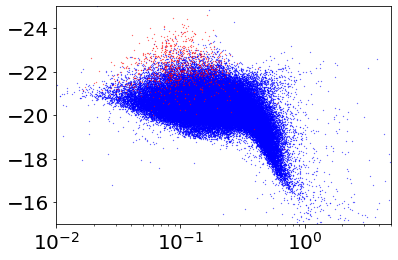

In [14]:
# Absolute magnitude
plt.plot(data1.dered_flux_g/data1.dered_flux_z, data1['abs_mag_r'], 'b.', ms=.5)

plt.plot(data2.dered_flux_g/data2.dered_flux_z, data2['abs_mag_r'], 'r.', ms=.5)
plt.xscale('log')
plt.ylim([-15, -25])
plt.xlim([1e-2, 5])

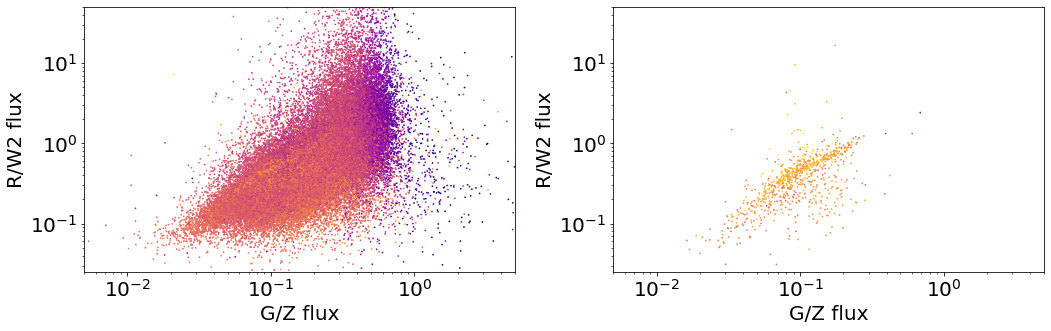

In [15]:
# Magnitude comparison
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(data1.dered_flux_g/data1.dered_flux_z, 
                data1.dered_flux_r/data1.dered_flux_w2, 
                cmap='plasma_r', s=.5, c=data1['abs_mag_r'], vmax=-16, vmin=-24)
axes[0].set_xlabel("G/Z flux")
axes[0].set_ylabel("R/W2 flux")
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim([.5e-2, 5])
axes[0].set_ylim([.25e-1, 50])

axes[1].scatter(data2.dered_flux_g/data2.dered_flux_z,
                data2.dered_flux_r/data2.dered_flux_w2, 
                cmap='plasma_r', s=.5, c=data2['abs_mag_r'], vmin=-24, vmax=-16)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim([.5e-2, 5])
axes[1].set_ylim([.25e-1, 50])
axes[1].set_xlabel("G/Z flux")
axes[1].set_ylabel("R/W2 flux")

plt.tight_layout()

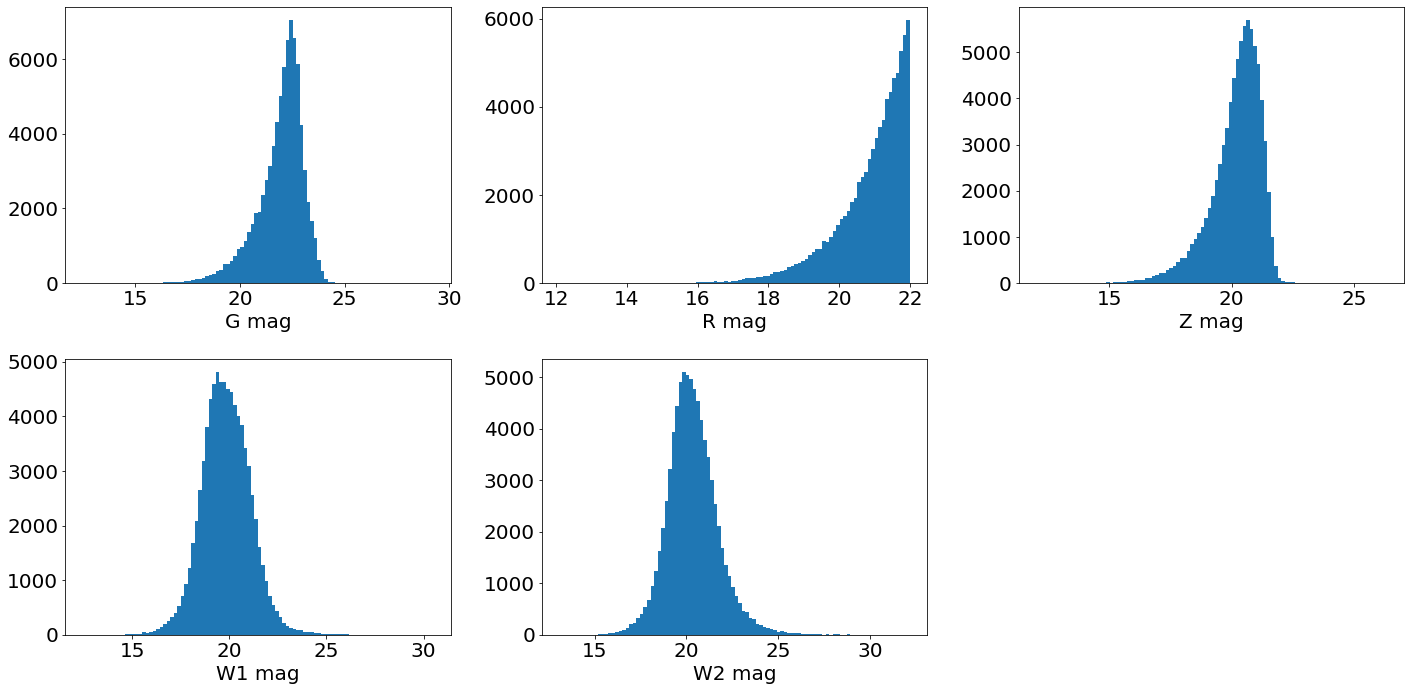

In [16]:
data = data1
fig, axes = plt.subplots(2, 3, figsize=(20,10))

axes[0,0].hist(data['dered_mag_g'], bins=100)
axes[0,0].set_xlabel('G mag')

axes[0,1].hist(data['dered_mag_r'], bins=100)
axes[0,1].set_xlabel('R mag')

axes[0,2].hist(data['dered_mag_z'], bins=100)
axes[0,2].set_xlabel('Z mag')

axes[1,0].hist(data['dered_mag_w1'], bins=100)
axes[1,0].set_xlabel('W1 mag')

axes[1,1].hist(data['dered_mag_w2'], bins=100)
axes[1,1].set_xlabel('W2 mag')

axes[1,2].axis('off')
plt.tight_layout()
# plt.savefig('desi_magnitudes.png', bbox_inches='tight')

In [17]:
iptf16 = pd.read_csv("../data/IPTF16geu.csv")

dm = 5*np.log10(300000*iptf16.z_phot_median/70)+25
Miptf = iptf16.dered_mag_r - dm

dchisq_iptf = np.min(np.array(iptf16[dchisq_labels]))
rchisq_iptf = np.sum(np.array(iptf16[rchisq_labels]))
dchisq_iptf = 263783.94
iptf16[rchisq_labels]

,rchisq_g,rchisq_r,rchisq_z,rchisq_w1,rchisq_w2
0,1.63216,2.068183,4.242084,16.638714,1.547884


/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'Abs Magnitude (lensed)')

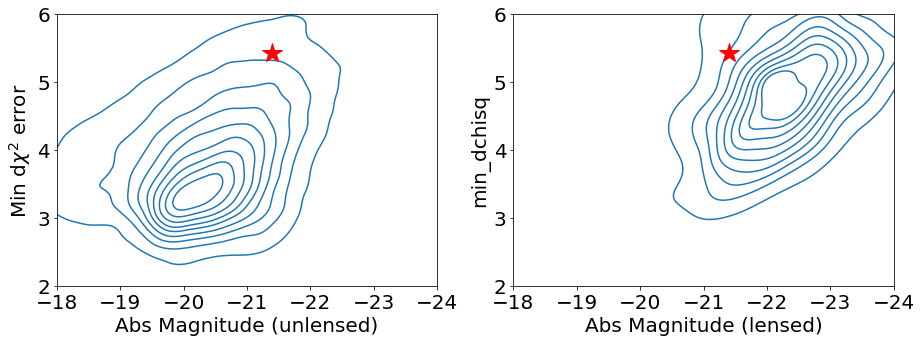

In [18]:
# Make contour plot of dchisq vs. abs magnitude
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.kdeplot(data1['abs_mag_r'], y=np.log10(data1['min_dchisq']), ax=axes[0])
axes[0].plot(Miptf, np.log10(dchisq_iptf), 'r*', ms=20)
axes[0].set_xlim([-18, -24])
axes[0].set_ylim([2, 6])
axes[0].set_xlabel("Abs Magnitude (unlensed)")
axes[0].set_ylabel("Min d$\chi^2$ error")

sns.kdeplot(data2['abs_mag_r'], y=np.log10(data2['min_dchisq']), ax=axes[1])
axes[1].plot(Miptf, np.log10(dchisq_iptf), 'r*', ms=20)
axes[1].set_xlim([-18, -24])
axes[1].set_ylim([2, 6])
axes[1].set_xlabel("Abs Magnitude (lensed)")

Text(0, 0.5, 'Log$_10$(r$\\chi^2$ error)')

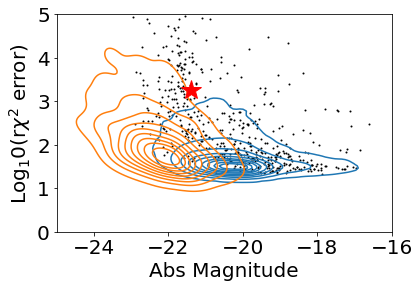

In [20]:
# Make contour plot of rchisq vs. abs magnitude
# fig, ax = plt.subplots()

chisq2 = np.array(data2[rchisq_labels])
sum_chisq2 = np.sum(chisq2, axis=1)

chisq1 = np.array(data1[rchisq_labels])
sum_chisq1 = np.sum(chisq1, axis=1)

chisq3 = np.array(data3[rchisq_labels])
sum_chisq3 = np.sum(chisq3, axis=1)

sns.kdeplot(data1['abs_mag_r'], y=np.log(data1['sum_rchisq']))
sns.kdeplot(data2['abs_mag_r'], y=np.log(data2['sum_rchisq']))

# IPTF16geu
plt.plot(Miptf, np.log(rchisq_iptf), 'r*', ms=20)
# Ampel run
plt.scatter(data3['abs_mag_r'], np.log(data3['sum_rchisq']), c='k', s=1)
# plt.plot([-20, -20], [-2,5], 'k--')
# plt.plot([-25, -16], [.5, .5], 'k--')

# Plotting
plt.xlim([-25, -16])
plt.ylim([0, 5])
plt.xlabel("Abs Magnitude")
plt.ylabel("Log$_10$(r$\chi^2$ error)")
# plt.legend()
# plt.savefig("rchisq_contours.png")

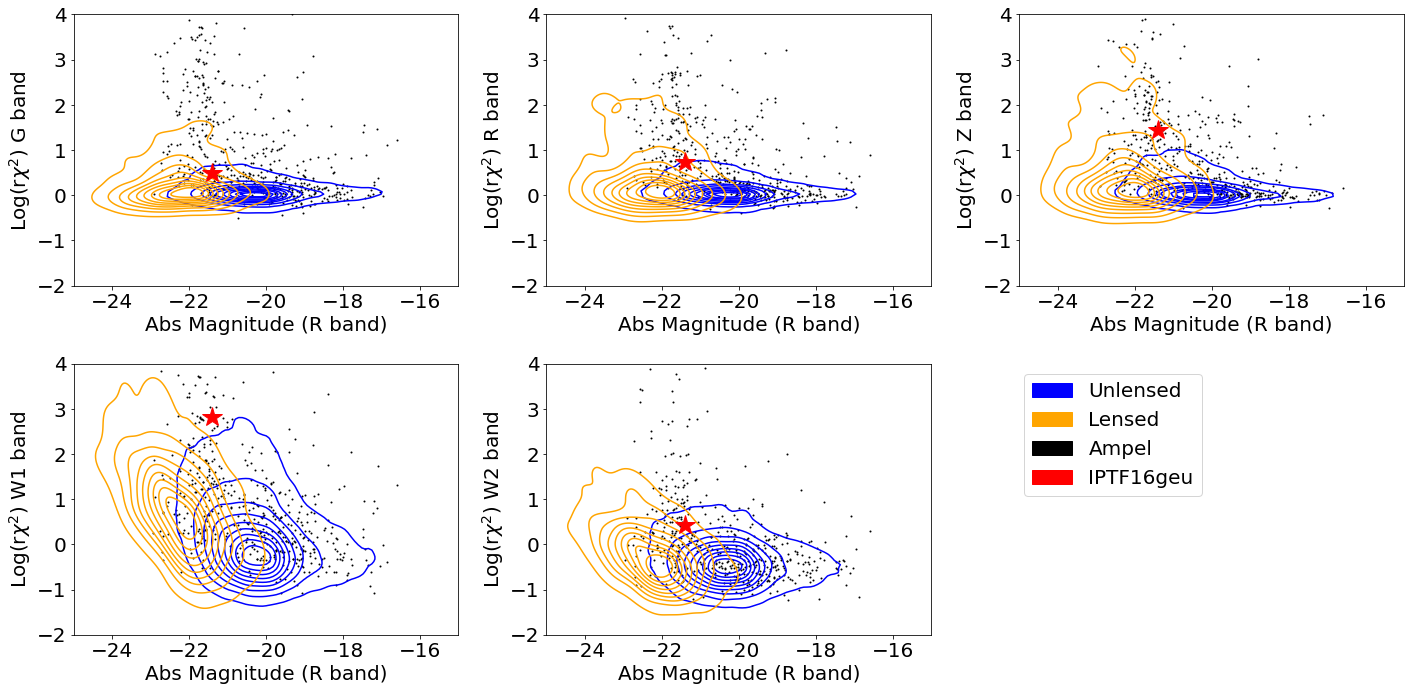

In [37]:
fig, axes = plt.subplots(2, 3, figsize=[20,10])
labels = ['g', 'r', 'z', 'w1', 'w2']

axes_flat = axes.flatten()[:-1]
for i, ax in enumerate(axes_flat):
    label = 'rchisq_'+labels[i]
    sns.kdeplot(data1['abs_mag_r'], y=np.log(data1[label]), color='b', ax=ax)
    sns.kdeplot(data2['abs_mag_r'], y=np.log(data2[label]), color='orange', ax=ax)
    ax.scatter(data3['abs_mag_r'], np.log(data3[label]), c='k', s=1)
    ax.plot(Miptf, np.log(iptf16[label]), 'r*', ms=20)
    
    # Labels
    ax.set_xlabel("Abs Magnitude (R band)")
    ax.set_ylabel(f"Log(r$\chi^2$) {labels[i].upper()} band")
    
    ax.set_xlim([-25, -15])
    ax.set_ylim([-2, 4])

# Legend
labels = ['Unlensed', 'Lensed', 'Ampel', 'IPTF16geu']
colors = ['b', 'orange', 'k', 'r']
handles = [mpl.patches.Patch(color=col, label=lab) for col, lab in zip(colors, labels)]
plt.legend(handles=handles, bbox_to_anchor=(.5, 1))

# axes[1,1].legend()
axes[1,2].axis('off')
plt.tight_layout()
plt.savefig("rchisq_bands.png", bbox_inches='tight')

In [10]:
data1.columns

Index(['ls_id', 'ra', 'dec', 'type', 'dered_mag_g', 'dered_mag_r',
       'dered_mag_z', 'dered_mag_w1', 'dered_mag_w2', 'snr_g', 'snr_r',
       'snr_z', 'snr_w1', 'snr_w2', 'z_phot_median', 'z_phot_std', 'z_spec',
       'dered_flux_g', 'dered_flux_r', 'dered_flux_z', 'dered_flux_w1',
       'dered_flux_w2', 'dchisq_1', 'dchisq_2', 'dchisq_3', 'dchisq_4',
       'dchisq_5', 'rchisq_g', 'rchisq_r', 'rchisq_z', 'rchisq_w1',
       'rchisq_w2', 'psfsize_g', 'psfsize_r', 'psfsize_z', 'sersic',
       'sersic_ivar', 'shape_e1', 'shape_e1_ivar', 'shape_e2', 'shape_e2_ivar',
       'shape_r', 'shape_r_ivar', 'lensed'],
      dtype='object')

In [12]:
data2['type'].value_counts()

SER    509
DEV    237
REX    122
EXP     14
Name: type, dtype: int64

In [13]:
data1['type'].value_counts()

REX    3910
EXP    2724
SER    1740
DEV    1626
Name: type, dtype: int64

In [21]:
bands = ['g', 'r', 'z', 'w1', 'w2']
trac_cols = ['ls_id', 'ra', 'dec', 'type'] \
            + ['dered_mag_'+b for b in bands] \
            + ['dered_flux_'+b for b in bands] \
            + ['snr_'+b for b in bands] \
            + ['flux_ivar_'+b for b in bands] \
            + ['dchisq_'+str(i) for i in range(1,6)] \
            + ['rchisq_'+b for b in bands] \
            + ['sersic', 'sersic_ivar'] \
            + ['psfsize_g', 'psfsize_r', 'psfsize_z'] \
            + ['shape_r', 'shape_e1', 'shape_e2'] \
            + ['shape_r_ivar', 'shape_e1_ivar', 'shape_e2_ivar']
phot_z_cols = ['z_phot_median', 'z_phot_std', 'z_spec']

query_cols = ','.join(['trac.'+col for col in trac_cols])+','+','.join(['phot_z.'+col for col in phot_z_cols])

In [24]:
query =["""SELECT """ + query_cols + """ FROM ls_dr9.tractor AS trac 
    INNER JOIN ls_dr9.photo_z AS phot_z ON trac.ls_id = phot_z.ls_id 
    WHERE (q3c_radial_query(ra,dec,{},{},{})) """,
    """ ORDER BY q3c_dist({}, {}, trac.ra, trac.dec) ASC""",
    """ LIMIT {}"""]
print(query)
len(query)

['SELECT trac.ls_id,trac.ra,trac.dec,trac.type,trac.dered_mag_g,trac.dered_mag_r,trac.dered_mag_z,trac.dered_mag_w1,trac.dered_mag_w2,trac.dered_flux_g,trac.dered_flux_r,trac.dered_flux_z,trac.dered_flux_w1,trac.dered_flux_w2,trac.snr_g,trac.snr_r,trac.snr_z,trac.snr_w1,trac.snr_w2,trac.flux_ivar_g,trac.flux_ivar_r,trac.flux_ivar_z,trac.flux_ivar_w1,trac.flux_ivar_w2,trac.dchisq_1,trac.dchisq_2,trac.dchisq_3,trac.dchisq_4,trac.dchisq_5,trac.rchisq_g,trac.rchisq_r,trac.rchisq_z,trac.rchisq_w1,trac.rchisq_w2,trac.sersic,trac.sersic_ivar,trac.psfsize_g,trac.psfsize_r,trac.psfsize_z,trac.shape_r,trac.shape_e1,trac.shape_e2,trac.shape_r_ivar,trac.shape_e1_ivar,trac.shape_e2_ivar,phot_z.z_phot_median,phot_z.z_phot_std,phot_z.z_spec FROM ls_dr9.tractor AS trac \n    INNER JOIN ls_dr9.photo_z AS phot_z ON trac.ls_id = phot_z.ls_id \n    WHERE (q3c_radial_query(ra,dec,{},{},{})) ', ' ORDER BY q3c_dist({}, {}, trac.ra, trac.dec) ASC', ' LIMIT {}']


3

# Duplicate graph with current data

In [1]:
import os
os.environ['SPS_HOME'] = "/global/homes/e/eramey16/fsps"
import numpy as np
import util
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams.update({'font.size': 20})

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
lensed = util.read_table("lensed_augmented")
unlensed = util.read_table("unlensed")
iptf16 = util.read_table("iptf16geu")

In [3]:
lensed = util.clean_and_calc(lensed)
unlensed = util.clean_and_calc(unlensed)
iptf16 = util.clean_and_calc(iptf16)

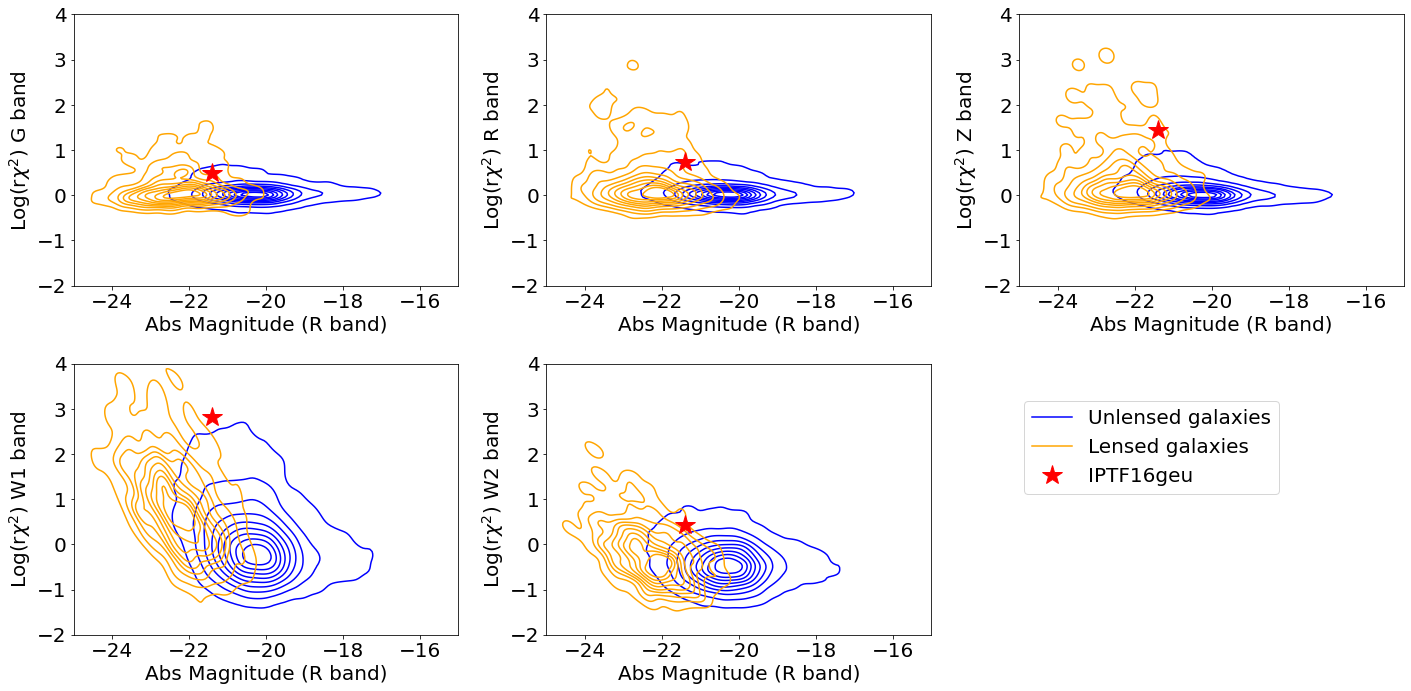

In [8]:
fig, axes = plt.subplots(2, 3, figsize=[20,10])
labels = ['g', 'r', 'z', 'w1', 'w2']

axes_flat = axes.flatten()[:-1]
for i, ax in enumerate(axes_flat):
    label = 'rchisq_'+labels[i]
    sns.kdeplot(unlensed['abs_mag_r'], y=np.log(unlensed[label]), color='b', ax=ax)
    sns.kdeplot(lensed['abs_mag_r'], y=np.log(lensed[label]), color='orange', ax=ax)
    ax.plot(iptf16['abs_mag_r'], np.log(iptf16[label]), 'r*', ms=20)
    
    # Labels
    ax.set_xlabel("Abs Magnitude (R band)")
    ax.set_ylabel(f"Log(r$\chi^2$) {labels[i].upper()} band")
    
    ax.set_xlim([-25, -15])
    ax.set_ylim([-2, 4])

# Legend
blue_line = mlines.Line2D([], [], color='b', linestyle='-',
                          label='Unlensed galaxies')
orange_line = mlines.Line2D([], [], color='orange', linestyle='-', 
                            label='Lensed galaxies')
red_star = mlines.Line2D([], [], color='r', marker='*', linestyle='None',
                          markersize=20, label='IPTF16geu')

plt.legend(handles=[blue_line, orange_line, red_star], bbox_to_anchor=(.7,.9))
fig.patch.set_facecolor('white')

# Legend
# labels = ['Unlensed', 'Lensed', 'IPTF16geu']
# colors = ['b', 'orange', 'r']
# handles = [mpl.patches.Patch(color=col, label=lab) for col, lab in zip(colors, labels)]
# plt.legend(handles=handles, bbox_to_anchor=(.5, 1))
# plt.legend(bbox_to_anchor=(.5, 1))

# axes[1,1].legend()
axes[1,2].axis('off')
plt.tight_layout()
plt.savefig("rchisq_poster.png", bbox_inches='tight')

# Augment data

In [1]:
from util import collect_gals, clean_and_calc, collect_all, write_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Read in A lens IDs and write grade
A_lenses = pd.concat([collect_all("../data/lensed/Huang21_A/"), 
            collect_all("../data/lensed/ML_A/")])
A_lenses = clean_and_calc(A_lenses)

# Read in B lens IDs and write grade
B_lenses = pd.concat([collect_all("../data/lensed/Huang21_B/"),
           collect_all("../data/lensed/ML_B/")])
B_lenses = clean_and_calc(B_lenses)

# Read in C lens IDs and write grade
C_lenses = pd.concat([collect_all("../data/lensed/Huang21_C/"),
           collect_all("../data/lensed/ML_C/")])
C_lenses = clean_and_calc(C_lenses)

In [3]:
A_lenses.columns

Index(['ls_id', 'ra', 'dec', 'type', 'dered_mag_g', 'dered_mag_r',
       'dered_mag_z', 'dered_mag_w1', 'dered_mag_w2', 'dered_flux_g',
       'dered_flux_r', 'dered_flux_z', 'dered_flux_w1', 'dered_flux_w2',
       'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2', 'flux_ivar_g',
       'flux_ivar_r', 'flux_ivar_z', 'flux_ivar_w1', 'flux_ivar_w2',
       'dchisq_1', 'dchisq_2', 'dchisq_3', 'dchisq_4', 'dchisq_5', 'rchisq_g',
       'rchisq_r', 'rchisq_z', 'rchisq_w1', 'rchisq_w2', 'sersic',
       'sersic_ivar', 'psfsize_g', 'psfsize_r', 'psfsize_z', 'shape_r',
       'shape_e1', 'shape_e2', 'shape_r_ivar', 'shape_e1_ivar',
       'shape_e2_ivar', 'z_phot_median', 'z_phot_std', 'z_spec', 'lensed',
       'maggies_0', 'maggies_1', 'maggies_2', 'maggies_3', 'maggies_4',
       'maggies_unc_0', 'maggies_unc_1', 'maggies_unc_2', 'maggies_unc_3',
       'maggies_unc_4', 'maggies_fit_0', 'maggies_fit_1', 'maggies_fit_2',
       'maggies_fit_3', 'maggies_fit_4', 'dust2_med', 'tau_med',
       '

In [4]:
print(f"A lenses: {len(A_lenses)}\nB lenses: {len(B_lenses)}\nC lenses: {len(C_lenses)}")

A lenses: 364
B lenses: 233
C lenses: 748


In [5]:
A_lenses['grade'] = 'A'
A_lenses['weight'] = .5 / len(A_lenses)

B_lenses['grade'] = 'B'
B_lenses['weight'] = .3 / len(B_lenses)

C_lenses['grade'] = 'C'
C_lenses['weight'] = .2 / len(C_lenses)

# Make full lens dataframe
lenses = pd.concat([A_lenses, B_lenses, C_lenses])
lenses = clean_and_calc(lenses)

In [6]:
def flux2mag(flux):
    mags = 22.5 - 2.5*np.log10(flux)
    return mags

/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


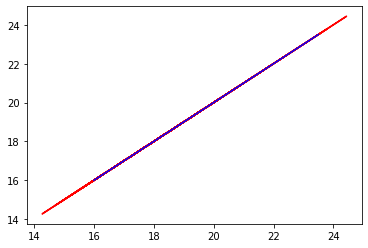

In [7]:
b = 'w2'
mags = 22.5 - 2.5*np.log10(lenses[f'dered_flux_{b}'])
plt.plot(mags, lenses[f'dered_mag_{b}'], 'r')
x = np.linspace(16, 23.5)
y = x
plt.plot(x, y, 'b')

In [8]:
# Get a random sample of galaxies to duplicate/vary
augmented = lenses.sample(n=10000-len(lenses), replace=True, weights=lenses['weight'],
                          ignore_index=True, random_state=seed)
augmented = clean_and_calc(augmented, duplicates=True)

In [9]:
augmented['grade'].value_counts()/len(augmented)

A    0.507106
B    0.294858
C    0.198036
Name: grade, dtype: float64

In [10]:
# Vary by uncertainty
bands = ['g', 'r', 'z', 'w1', 'w2']
for b in bands:
    new_fluxes = np.random.normal(loc=augmented['dered_flux_'+b], scale=augmented['flux_sigma_'+b])
    augmented['dered_flux_'+b] = new_fluxes
    augmented['dered_mag_'+b] = flux2mag(new_fluxes)

/tmp/ipykernel_39956/2719853538.py:2: RuntimeWarning: invalid value encountered in log10
  mags = 22.5 - 2.5*np.log10(flux)


In [11]:
# band = 'z'
# fig, axes = plt.subplots(1,2, figsize=[10,4])
# axes[0].hist(lenses[f'dered_flux_{band}'], bins=100)
# axes[1].hist(augmented[f'dered_flux_{band}'], bins=100)
# plt.show()

In [12]:
# Make up new ls_ids
N = len(augmented)
ones = np.ones((N,), dtype=int).astype(str).astype(object)
strings = np.random.randint(0, 9, (N,15)).astype(str).astype(object)
new_ids = ones+strings.sum(axis=1)
new_ids

array(['1338686238023363', '1702527641484262', '1744552680330515', ...,
       '1848327142318804', '1483658817571246', '1237111853250456'],
      dtype=object)

In [13]:
augmented['ls_id'] = new_ids
augmented = pd.concat([augmented, lenses])
augmented = augmented.sample(n=len(augmented), replace=False)
augmented

,ls_id,ra,dec,type,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_flux_g,...,flux_sigma_g,flux_sigma_r,flux_sigma_z,flux_sigma_w1,flux_sigma_w2,min_dchisq,sum_rchisq,abs_mag_r,grade,weight
1969,1447136735261043,7.674121,-33.976513,REX,21.658814,20.873881,19.726915,18.040451,18.294630,2.170073,...,0.025044,0.031937,0.101116,0.715034,1.329455,0.0000,9.023249,-21.885263,A,0.001374
505,1114608500880044,292.283254,55.803405,DEV,23.851393,21.916749,19.834128,18.296840,18.808142,0.288033,...,0.049184,0.108517,0.177770,0.609127,0.918312,2951.2444,4.980350,-20.938141,A,0.001374
2763,1787080817855287,186.715342,21.873753,SER,20.234171,18.335459,17.364397,16.689603,17.220666,8.059938,...,0.149997,0.246997,0.691543,1.420377,2.496834,37423.7850,10.306653,-22.995313,A,0.001374
44,9907738999326096,210.167366,56.130388,SER,20.439829,18.725970,17.782286,17.179016,17.675121,6.669114,...,0.124138,0.308435,0.365938,0.875406,1.411326,42583.1050,13.520491,-22.504866,B,0.001288
8435,1730546088633707,109.901786,27.903215,DEV,20.840080,19.066896,17.879556,17.060861,17.842163,4.612834,...,0.059430,0.108321,0.278173,1.010609,1.751276,76386.0900,6.045480,-22.721344,A,0.001374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1078370313120267,167.668516,36.823391,REX,21.780674,20.815295,19.499249,18.094798,18.889044,1.939681,...,0.068430,0.085000,0.133023,0.656933,1.180460,0.0000,6.895675,-21.751355,A,0.001374
295,9907736636690133,238.657536,46.155970,DEV,21.515860,20.376328,18.763298,17.246464,17.779978,2.475463,...,0.183494,0.315146,0.458913,0.982483,1.554584,3184.3220,8.993079,-22.297856,C,0.000267
6112,1403001101405185,113.256755,51.575489,SER,19.752358,18.258831,17.423339,17.010437,17.551288,12.561943,...,0.104107,0.214478,0.386974,1.044856,1.774730,80723.5100,10.462052,-22.613532,C,0.000267
27,9906620509062939,135.585066,-2.515947,DEV,21.788708,20.824816,20.071121,19.796965,20.567430,1.925384,...,0.087287,0.138853,0.341012,0.810642,1.671152,1524.3304,4.628708,-21.389573,C,0.000267


In [19]:
write_table(augmented, "lensed_augmented")

# Other stuff?

In [10]:
import util
from sqlalchemy import create_engine
from sqlalchemy.types import BIGINT, FLOAT, REAL, VARCHAR
db_name = 'lensed_augmented'

engine = create_engine(util.conn_string)
util.db_cols.update({col: REAL for col in list(augmented.columns)[4:]})

augmented.to_sql(db_name, engine, if_exists='append', dtype=util.db_cols, index=False)
with engine.connect() as conn:
    conn.execute(f'ALTER TABLE {db_name} ADD PRIMARY KEY (ls_id);')

In [56]:
band = 'g'
A_lenses[['unc_'+band, 'snr_'+band, 'flux_sigma_'+band, 'dered_flux_'+band, 'dered_mag_'+band]]

,unc_g,snr_g,flux_sigma_g,dered_flux_g,dered_mag_g
2,0.018051,55.397213,0.185410,11.078327,19.888815
3,0.007928,126.132780,0.041261,5.447954,20.659416
5,0.059343,16.851316,0.082473,1.483834,22.071537
7,0.017266,57.916718,0.065506,3.899020,21.022612
8,0.015313,65.302666,0.059430,4.603891,20.842188
...,...,...,...,...,...
242,0.002194,455.862730,0.090289,45.821457,18.347328
243,0.034104,29.321722,0.067225,2.022818,21.735107
245,0.004481,223.167790,0.168151,39.073290,18.520300
246,0.004778,209.288020,0.118627,27.920706,18.885183


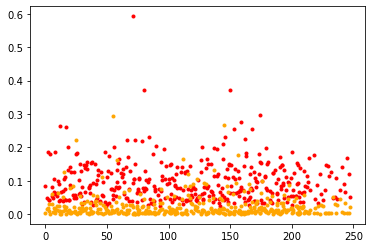

In [58]:
plt.plot(A_lenses['flux_sigma_'+band], 'r.')
plt.plot(A_lenses['unc_'+band], '.', color='orange')
# plt.plot(A_lenses['dered_flux_'+band], 'b.')
# plt.plot(A_lenses['dered_mag_'+band], 'g.')

In [9]:
import pandas as pd
import numpy as np
x = pd.DataFrame({'a':[1], 'b':[2]})
x[['c', 'd']] = None
x.loc[0, ['c', 'd']] = [3,4]
x

,a,b,c,d
0,1,2,3,4


In [1]:
from util import save_to_db, read_table
import prospect.io.read_results as reader

In [ ]:
##### res, obs, model = reader.results_from("../data/lensed/all_lensed/9906602215998531.h5")
save_to_db('../data/dr9_training/dr9_unlensed', db_name='unlensed', delete=False)

In [6]:
x = read_table('test')

# Machine Learning

- Started out just reading archive data from CSV
- 10/17/22 update: adding in prospector data from taskfarmer run and augmented lensed set
- 11/7/22 update: Adding in new columns from h5 files
- 1/19/23: Start running from here for latest data

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
# from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import util
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# lens_file = "../data/dr9_training/dr9_lensed.csv"
# unlens_file = "../data/dr9_training/dr9_unlensed.csv"
bands = ['g', 'r', 'z', 'w1', 'w2']
theta_labels = ['massmet_1', 'massmet_2', 'dust2', 'tau', 'logtmax']
use_cols = ['g/r', 'r/z', 'r/w1', 'r/w2', 'z_phot_median', 'chisq_maggies']
use_cols.extend([f"rchisq_{band}" for band in bands])
use_cols.extend([theta+"_med" for theta in theta_labels])
use_cols.extend([theta+"_sig_diff" for theta in theta_labels])
seed = 42

##### Load in data

In [3]:
lensed = util.read_table('lensed_augmented')
unlensed = util.read_table('unlensed')

lensed['lensed'] = True
unlensed['lensed'] = False
print(f"Before filtering\nLensed: {len(lensed)}\nUnlensed: {len(unlensed)}")

Before filtering
Lensed: 10000
Unlensed: 19667


In [4]:
unlensed.columns

Index(['ls_id', 'ra', 'dec', 'type', 'dered_mag_g', 'dered_mag_r',
       'dered_mag_z', 'dered_mag_w1', 'dered_mag_w2', 'dered_flux_g',
       'dered_flux_r', 'dered_flux_z', 'dered_flux_w1', 'dered_flux_w2',
       'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2', 'flux_ivar_g',
       'flux_ivar_r', 'flux_ivar_z', 'flux_ivar_w1', 'flux_ivar_w2',
       'dchisq_1', 'dchisq_2', 'dchisq_3', 'dchisq_4', 'dchisq_5', 'rchisq_g',
       'rchisq_r', 'rchisq_z', 'rchisq_w1', 'rchisq_w2', 'sersic',
       'sersic_ivar', 'psfsize_g', 'psfsize_r', 'psfsize_z', 'shape_r',
       'shape_e1', 'shape_e2', 'shape_r_ivar', 'shape_e1_ivar',
       'shape_e2_ivar', 'z_phot_median', 'z_phot_std', 'z_spec', 'maggies_0',
       'maggies_1', 'maggies_2', 'maggies_3', 'maggies_4', 'maggies_unc_0',
       'maggies_unc_1', 'maggies_unc_2', 'maggies_unc_3', 'maggies_unc_4',
       'maggies_fit_0', 'maggies_fit_1', 'maggies_fit_2', 'maggies_fit_3',
       'maggies_fit_4', 'dust2_med', 'tau_med', 'massmet_1_med',
 

In [5]:
lensed = util.clean_and_calc(lensed, filter_cols=use_cols)
unlensed = util.clean_and_calc(unlensed, filter_cols=use_cols)
print(f"After filtering\nLensed: {len(lensed)}\nUnlensed: {len(unlensed)}")

all_data = pd.concat([lensed, unlensed])
all_data = all_data.sample(frac=1, random_state=seed).reset_index(drop=True)
# all_data = all_data.dropna(subset=use_cols)
all_data

After filtering
Lensed: 9562
Unlensed: 17280


,ls_id,ra,dec,type,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_flux_g,...,sum_rchisq,abs_mag_r,grade,weight,dust2_sig_diff,tau_sig_diff,massmet_1_sig_diff,massmet_2_sig_diff,logtmax_sig_diff,id
0,9906620700297801,145.127172,-2.104812,REX,23.386840,21.921947,20.703400,19.620472,20.264984,0.441839,...,4.233158,-20.235685,NaN,NaN,-0.094358,0.029818,0.001982,-0.083735,0.047904,15165.0
1,1418732338531864,179.563234,-6.605569,SER,20.185557,18.388875,17.442245,17.013001,17.575567,8.429024,...,6.426153,-22.820813,A,0.001374,-0.000166,0.001142,-0.000119,0.000525,0.001282,NaN
2,9906620606448918,147.081439,-2.370770,REX,21.826906,21.344805,21.386738,21.923010,22.108860,1.858821,...,4.671808,-19.550688,NaN,NaN,0.013342,2.904678,0.002750,-0.062406,-0.005148,10827.0
3,9906621455141427,144.613530,-0.092536,EXP,22.843645,21.910250,21.398520,21.531070,21.717380,0.728689,...,3.860161,-19.677531,NaN,NaN,-0.001312,2.635719,-0.002041,0.064189,-0.011440,2308.0
4,1504074757570507,223.246425,33.397013,DEV,21.290757,19.955787,18.754178,17.790572,18.297752,3.045772,...,6.600194,-22.165601,B,0.001288,-0.000163,0.001287,-0.000310,-0.009286,0.001093,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26837,9906620794668702,145.085702,-1.702360,SER,18.864490,17.611187,16.887299,17.033018,17.633370,28.457987,...,6.831027,-22.272491,NaN,NaN,0.000332,0.000258,-0.000585,0.000133,0.000022,13673.0
26838,1218231660280687,118.449073,20.952805,SER,22.349496,20.114515,18.190984,16.630975,17.219693,1.148686,...,6.229212,-22.642600,A,0.001374,0.000006,0.002869,-0.000363,0.002436,-0.000493,NaN
26839,1722551662668028,134.150340,23.864145,SER,20.901005,19.092525,17.859057,16.820513,17.199906,4.361120,...,9.710891,-22.738577,B,0.001288,0.000114,0.001661,0.000194,0.002849,0.000329,NaN
26840,9906620134853673,147.386972,-3.405872,REX,22.494726,20.732610,19.752810,18.894453,19.427706,1.004870,...,5.295374,-20.846999,NaN,NaN,-0.007859,0.003350,0.003195,-0.046124,0.018487,7102.0


##### Split into training and testing sets

In [6]:
X, y = all_data[use_cols], all_data['lensed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)

In [7]:
parameters = {
    'n_estimators': np.arange(50, 550, 50),
    'max_depth': np.arange(3, 21, 2),
    'max_samples': np.arange(0.7, 1.1, .1),
    'criterion': ('gini', 'entropy'),
    'max_features': ('auto', None),
    'random_state': [seed],
    'class_weight': ['balanced'],
}

In [8]:
# Random Forest model
# model = RandomForestClassifier(n_estimators=200, max_depth=5, max_samples=.8, 
#                              class_weight='balanced', random_state=seed)
# define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=seed)
# # evaluate model
# # scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# rf = RandomForestClassifier()
# # Grid search
# clf = GridSearchCV(rf, parameters, scoring='roc_auc', cv=cv)
# clf.fit(X_train, y_train)

In [9]:
# # Predict
# y_pr = clf.decision_function(X_test)
# preds = clf.predict(X_test)
# # summarize performance
# print('ROC AUC: %.3f' % roc_auc_score(y_test, y_pr))
# # print('Std Dev: %.3f' % np.std(scores))
# print("Confusion matrix:")
# confusion_matrix(y_test, preds)

##### Classify

In [22]:
clf = RandomForestClassifier(n_estimators=200, max_depth=5, max_samples=.8, 
                             class_weight={True:1, False:15}, random_state=seed)

In [23]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={False: 15, True: 1}, max_depth=5,
                       max_samples=0.8, n_estimators=200, random_state=42)

In [24]:
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.8442913019184206

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(f"FPR: {fp / (fp + tn) :.4f}")
pd.DataFrame({"TN": [tn], "FP": [fp], "FN": [fn], "TP": [tp]})

FPR: 0.0055


,TN,FP,FN,TP
0,3416,19,817,1117


In [31]:
results = pd.DataFrame(clf.feature_importances_.reshape(1, -1), columns=X_train.columns)
results.sort_values(by=0, axis='columns', ascending=False)

,chisq_maggies,massmet_1_med,massmet_2_med,logtmax_med,tau_med,dust2_med,tau_sig_diff,r/z,g/r,massmet_1_sig_diff,...,r/w1,massmet_2_sig_diff,rchisq_z,r/w2,rchisq_w1,rchisq_g,dust2_sig_diff,rchisq_w2,logtmax_sig_diff,rchisq_r
0,0.22519,0.151306,0.141482,0.132715,0.097712,0.056183,0.032631,0.025589,0.025286,0.017284,...,0.012327,0.01085,0.008808,0.008191,0.008158,0.007438,0.006745,0.006509,0.005715,0.004364


### Ampel data classified

In [13]:
ampel_data = pd.read_csv("../data/dr9_training/ampel_test.csv")
test_data = ampel_data[use_cols]
ampel_data['lensed'] = clf.predict(test_data)

In [14]:
lens_cands = ampel_data[ampel_data['lensed']]
lens_cands = lens_cands[['ls_id', 'ra', 'dec']]
# lens_cands.to_csv("../data/dr9_training/ampel_candidates.csv", index=False)
lens_cands

,ls_id,ra,dec
0,9906626190446675,339.504678,12.590152
9,9906620181841745,326.766587,-3.539431
11,9906616821878617,346.364311,-12.582950
17,9906631083100135,355.347056,26.334676
19,9906617280889281,333.032626,-11.301574
...,...,...,...
452,9906616179362060,350.811290,-14.307182
458,9906624927501582,117.573499,9.231810
460,9906629182098217,10.306205,20.994368
475,9906616463789078,26.756593,-13.146844


### COSMOS data classified

In [15]:
cosmos_data = pd.read_csv("../data/dr9_training/dr9_cosmos_test.csv")
test_data = cosmos_data[use_cols]
cosmos_data['lensed'] = clf.predict(test_data)

In [16]:
lens_cands = cosmos_data[cosmos_data['lensed']]
lens_cands = lens_cands[['ls_id', 'ra', 'dec']]
# lens_cands.to_csv("../data/dr9_training/cosmos_candidates.csv", index=False)
lens_cands

,ls_id,ra,dec
14,9906620322810779,145.155979,-3.040837
22,9906620322811323,145.186169,-3.044539
25,9906620322809976,145.110965,-2.987331
35,9906620322809844,145.103526,-2.965712
52,9906620322811018,145.170480,-2.969162
...,...,...,...
80635,9906620606514540,147.323681,-2.238612
80638,9906620606515154,147.348849,-2.252301
80667,9906620795129671,146.969505,-1.642987
80690,9906620606451361,147.226845,-2.152765


### Test data classified

In [22]:
one_gal = pd.read_csv('../data/special_run/galaxy_info.csv')
one_gal = one_gal[use_cols]
clf.predict(one_gal)

array([False])

# Ampel run

In [1]:
from util import collect_gals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [2]:
data = collect_gals("../data/ampel_run")
data = data[data['z_phot_median']>=0]
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [3]:
data

,ls_id,ra,dec,type,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,snr_g,...,psfsize_r,psfsize_z,sersic,sersic_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,shape_r,shape_r_ivar
0,9906626190446675,339.504678,12.590152,SER,17.274237,16.327522,15.667729,15.858350,16.365630,0.002002,...,9197.47950,1.364956,2.119449,1.116753,4.160773,89431.600,0.017794,700729.940,0.034764,998456.560
1,9906628295266353,24.446324,18.377803,SER,18.438350,17.664242,17.085630,16.392185,16.196589,0.001971,...,4216.94780,1.779299,1.421529,1.647529,1.038640,334908.280,-0.044761,350040.720,0.091164,554638.200
2,9907732793330661,279.468548,32.884967,REX,20.619589,19.768860,19.233198,19.248898,19.860447,0.009714,...,0.00000,2.131331,2.433292,1.163009,0.379507,28700.676,0.000000,0.000,0.000000,0.000
3,9906620618904648,194.687165,-2.287789,SER,18.974031,18.300507,17.691603,16.728569,16.642950,0.002433,...,142.61302,1.574747,1.529170,1.322073,0.725395,106753.530,-0.066110,66314.690,0.088478,85134.984
4,9907736021568351,162.932965,44.122499,REX,20.470890,20.285822,20.214720,20.296675,20.797098,0.009371,...,0.00000,2.388395,1.671395,1.372762,0.455471,12305.658,0.000000,0.000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,9906628745692582,38.513121,19.778986,SER,20.615206,20.119373,19.788725,20.356400,20.884573,0.012112,...,878.79870,1.991021,1.357979,1.572777,1.299122,49949.650,-0.255090,52010.130,-0.171301,51851.184
863,9906616186176377,17.537106,-14.037272,PSF,20.136340,20.183264,19.470478,18.319128,18.013546,0.003702,...,0.00000,1.172151,1.020484,1.174903,0.000000,0.000,0.000000,0.000,0.000000,0.000
864,9906618304630170,332.107606,-8.524351,EXP,20.576668,20.255249,20.069975,20.331870,21.617674,0.007245,...,0.00000,1.802944,1.427711,1.347097,1.059744,16313.130,0.143608,14957.955,-0.205817,18269.914
866,9906619995653644,335.547332,-4.006682,SER,17.087030,16.223003,15.647518,15.981176,16.495977,0.001417,...,10651.08700,1.799602,1.517788,1.115061,4.348343,1158340.600,0.015084,1659860.200,0.157347,2303901.000


In [4]:
data.to_csv("../data/ampel_run/galaxy_info.csv", index=False)

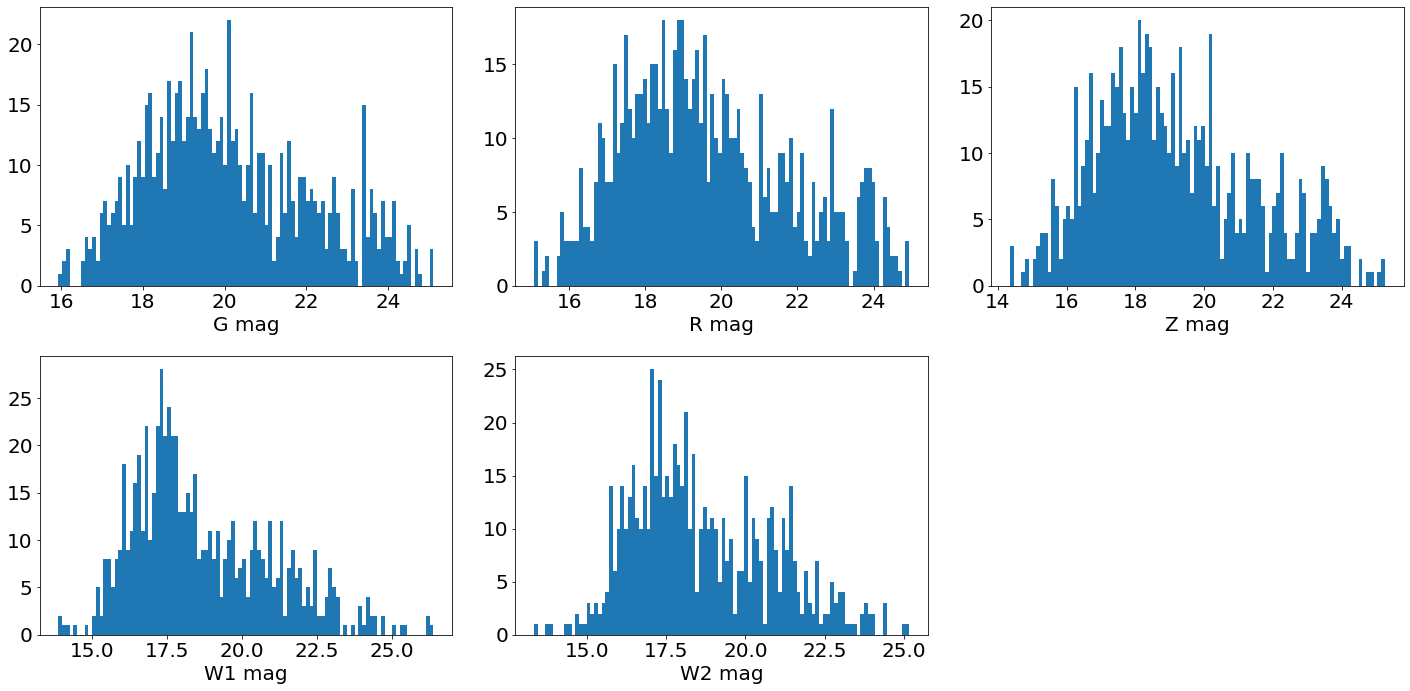

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))

axes[0,0].hist(data['dered_mag_g'], bins=100)
axes[0,0].set_xlabel('G mag')

axes[0,1].hist(data['dered_mag_r'], bins=100)
axes[0,1].set_xlabel('R mag')

axes[0,2].hist(data['dered_mag_z'], bins=100)
axes[0,2].set_xlabel('Z mag')

axes[1,0].hist(data['dered_mag_w1'], bins=100)
axes[1,0].set_xlabel('W1 mag')

axes[1,1].hist(data['dered_mag_w2'], bins=100)
axes[1,1].set_xlabel('W2 mag')

axes[1,2].axis('off')
plt.tight_layout()
plt.savefig('ampel_magnitudes.png', bbox_inches='tight')

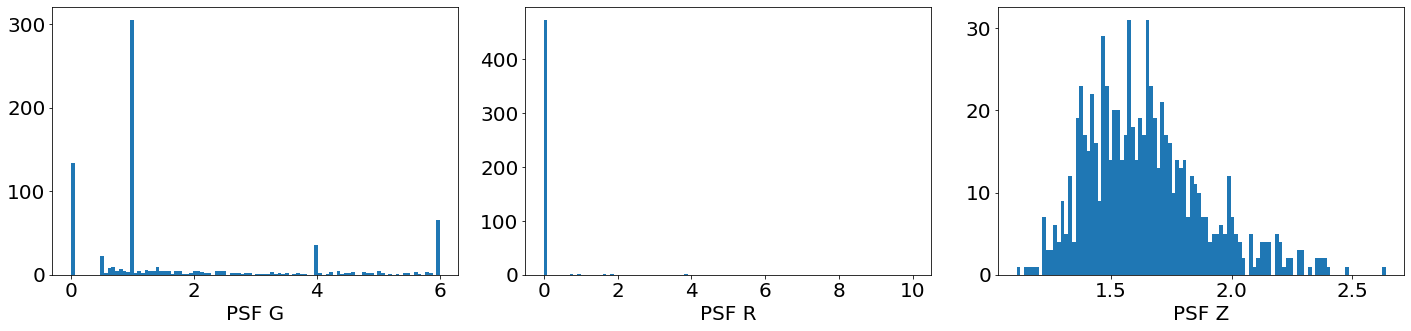

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

axes[0].hist(data['psfsize_g'], bins=100)
axes[0].set_xlabel('PSF G')

axes[1].hist(data['psfsize_r'], bins=100, range=(0,10))
axes[1].set_xlabel('PSF R')

axes[2].hist(data['psfsize_z'], bins=100)
axes[2].set_xlabel('PSF Z')

plt.tight_layout()
plt.savefig("ampel_psfs.png", bbox_inches='tight')

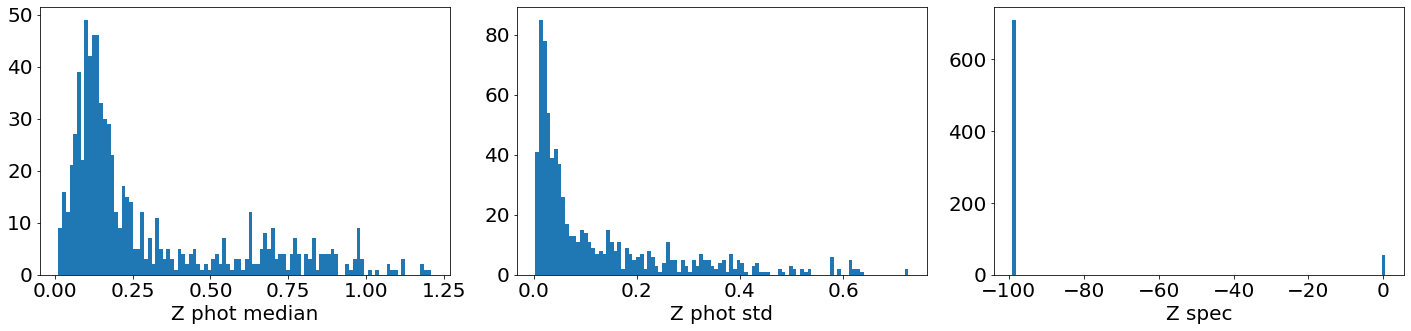

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

axes[0].hist(data['z_phot_median'], bins=100)
axes[0].set_xlabel('Z phot median')

axes[1].hist(data['z_phot_std'], bins=100)
axes[1].set_xlabel('Z phot std')

axes[2].hist(data['z_spec'], bins=100)
axes[2].set_xlabel('Z spec')

plt.tight_layout()
plt.savefig("ampel_phot.png", bbox_inches='tight')
# reject anything that has a value less than zero

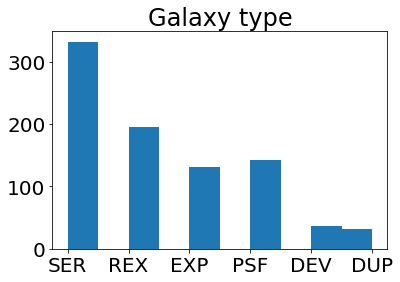

In [61]:
plt.hist(data['type'])
plt.title("Galaxy type")
plt.savefig("ampel_types.png", bbox_inches='tight')

# Results of grid search

In [6]:
import pickle
import os
os.environ['SPS_HOME'] = "/global/homes/e/eramey16/fsps"
from docker import util
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [7]:
bands = ['g', 'r', 'z', 'w1', 'w2']
theta_labels = ['massmet_1', 'massmet_2', 'dust2', 'tau', 'logtmax']
use_cols = ['g/r', 'r/z', 'r/w1', 'r/w2', 'z_phot_median', 'chisq_maggies']
use_cols.extend([f"rchisq_{band}" for band in bands])
use_cols.extend([theta+"_med" for theta in theta_labels])
use_cols.extend([theta+"_sig_diff" for theta in theta_labels])
seed = 42

In [8]:
len(use_cols)

21

In [9]:
with open('gridsearch_models/gridsearch_2023-02-15.sav', 'rb') as file:
    clf = pickle.load(file)

/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GridSearchC

In [11]:
lensed = util.read_table("lensed_augmented")
unlensed = util.read_table("unlensed")
print(f"Data set:\n Lensed: {len(lensed)}\n Unlensed: {len(unlensed)}")

# Set lensed and unlensed status (just in case)
lensed['lensed'] = True
unlensed['lensed'] = False

# Filter
lensed = util.clean_and_calc(lensed, filter_cols=use_cols, i_band=False)
unlensed = util.clean_and_calc(unlensed, filter_cols=use_cols, i_band=False)

print(f"After filtering:\n Lensed: {len(lensed)}\n Unlensed: {len(unlensed)}")

# Concatenate lensed and unlensed data, mix up
all_data = pd.concat([lensed, unlensed])
all_data = all_data.sample(frac=1, random_state=seed).reset_index(drop=True)

# Split into training and testing
X, y = all_data[use_cols], all_data['lensed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)

Data set:
 Lensed: 10000
 Unlensed: 19667
After filtering:
 Lensed: 9562
 Unlensed: 17280


/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in

In [12]:
thresh = 0.02

# preds = clf.predict(X_test)
preds = clf.predict_proba(X_test)[:,0] < thresh

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(accuracy_score(y_test, preds))
print(f"FPR: {fp / (fp + tn) :.4f}")
pd.DataFrame({"TN": [tn], "FP": [fp], "FN": [fn], "TP": [tp]})

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
thresh = 0.02

# preds = clf.predict(X_test)
preds = clf.predict_proba(X_test)[:,0] < thresh

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(accuracy_score(y_test, preds))
print(f"FPR: {fp / (fp + tn) :.4f}")
pd.DataFrame({"TN": [tn], "FP": [fp], "FN": [fn], "TP": [tp]})

0.9225181598062954
FPR: 0.0009


,TN,FP,FN,TP
0,3432,3,413,1521


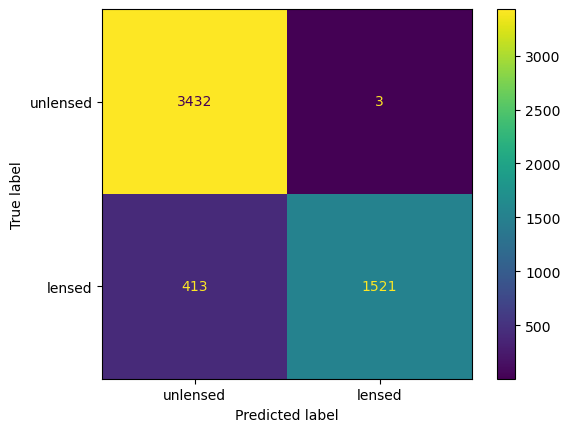

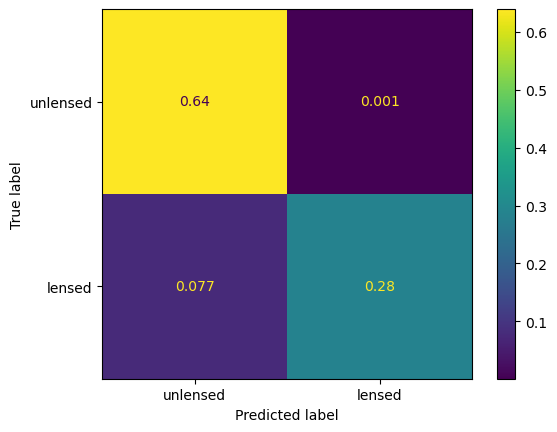

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
c_m = np.array([[3432, 3], [413, 1521]])
ConfusionMatrixDisplay(c_m, display_labels=['unlensed', 'lensed']).plot()
plt.savefig('figs/cm_nums.png', bbox_inches='tight')
ConfusionMatrixDisplay(np.round(c_m/np.sum(c_m), 3), display_labels=['unlensed', 'lensed']).plot()
plt.savefig('figs/cm_norm.png', bbox_inches='tight')

In [8]:
results = pd.DataFrame(clf.best_estimator_.feature_importances_.reshape(1, -1), columns=X_train.columns)
results.sort_values(by=0, axis='columns', ascending=False)

,chisq_maggies,tau_med,massmet_1_med,logtmax_med,tau_sig_diff,massmet_2_med,dust2_med,r/z,massmet_1_sig_diff,dust2_sig_diff,...,massmet_2_sig_diff,rchisq_g,rchisq_z,r/w1,rchisq_r,logtmax_sig_diff,z_phot_median,rchisq_w1,rchisq_w2,r/w2
0,0.176621,0.127743,0.123799,0.075363,0.067834,0.051446,0.049923,0.046223,0.044382,0.025288,...,0.024464,0.023489,0.021089,0.019843,0.019235,0.017629,0.016366,0.015759,0.014543,0.013919


In [33]:
test = clf.predict_proba(X_test)[:,0] < .1
test

array([False, False, False, ..., False, False, False])

In [34]:
preds

array([False, False, False, ..., False, False, False])

In [35]:
all(test == preds)

False

In [25]:
clf.predict(one_gal)

array([False])